# DATA PREPARATION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("/kaggle/input/co2-emissions-prediction-DSC-RASIO-2025/dataset/datatrain.csv")
tes = pd.read_csv("/kaggle/input/co2-emissions-prediction-DSC-RASIO-2025/dataset/datatest.csv")

In [3]:
train

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

obs_id       date  daily_ktCO2   pm25  pm10    o3   no2  so2  env_index  \
0          1   1/1/2020    42.471115   74.0  46.0  11.0  15.0  NaN   0.506768   
1          2   1/2/2020    44.128139   93.0  52.0  12.0  18.0  NaN   0.673507   
2          3   1/3/2020    44.960525  102.0  56.0  16.0  18.0  NaN   0.440693   
3          4   1/4/2020    44.524260  121.0  61.0  15.0  17.0  NaN   0.109702   
4          5   1/5/2020    44.428186  130.0  66.0  14.0  27.0  NaN   0.643137   
...      ...        ...          ...    ...   ...   ...   ...  ...        ...   
1601    1602  5/20/2024    49.143115   64.0  26.0  23.0   NaN    1   0.620641   
1602    1603  5/21/2024    51.349693   56.0  26.0  11.0   NaN    1   0.005331   
1603    1604  5/22/2024    52.405751   53.0  23.0   9.0   NaN    1   0.847391   
1604    1605  5/23/2024    50.681848   50.0  18.0  20.0   1.0    3   0.958030   
1605    1606  5/24/2024    52.676925   46.0  21.0  11.0   1.0    2   0.580304   

      Car_7-9  ...  cloudcover  visibility  solarradiation  solarenergy  \
0         NaN  ...        47.4         9.9           113.1          9.9   
1         NaN  ...        34.4        10.0            82.6          7.2   
2         NaN  ...        35.5         9.8            88.8          7.8   
3         NaN  ...        30.4         9.9            85.3          7.3   
4         NaN  ...        31.6         9.7            88.7          7.5   
...       ...  ...         ...         ...             ...          ...   
1601      NaN  ...        53.0         9.7           107.1          9.4   
1602      NaN  ...        60.6         9.3           128.8         11.0   
1603      NaN  ...        58.3         9.5           141.3         12.3   
1604      NaN  ...        70.4         9.0            98.4          8.5   
1605      NaN  ...        58.1         9.6           112.6          9.8   

      uvindex  moonphase              conditions  weekend  seasons  holiday  
0         5.0       0.19        Partially cloudy    False      NaN      Yes  
1         3.0       0.22        Partially cloudy    False     Cool       No  
2         3.0       0.25        Partially cloudy    False     Cool       No  
3         3.0       0.29                     NaN      NaN     Cool      Yes  
4         3.0       0.32        Partially cloudy      NaN     Cool      Yes  
...       ...        ...                     ...      ...      ...      ...  
1601      6.0       0.39  Rain, Partially cloudy      NaN      HoT       No  
1602      8.0       0.42  Rain, Partially cloudy    False      Hot       No  
1603      9.0       0.46  Rain, Partially cloudy    False      Hot      NaN  
1604      4.0       0.50  Rain, Partially cloudy    False      Hot      NaN  
1605      4.0       0.52  Rain, Partially cloudy      NaN      Hot       No  

[1606 rows x 60 columns]

In [4]:
tes

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

obs_id       date  pm25  pm10    o3  no2  so2  env_index  Car_7-9  \
0      1607  5/25/2024  50.0  24.0  11.0  NaN  1.0   0.064032      NaN   
1      1608  5/26/2024  42.0  26.0  11.0  NaN  1.0   0.778897      NaN   
2      1609  5/27/2024  52.0  27.0   9.0  NaN  1.0   0.579115      NaN   
3      1610  5/28/2024  59.0  32.0   9.0  NaN  NaN   0.410545      NaN   
4      1611  5/29/2024  59.0  30.0  10.0  NaN  NaN   0.764583      NaN   
..      ...        ...   ...   ...   ...  ...  ...        ...      ...   
397    2004  6/26/2025  61.0  24.0   NaN  NaN  1.0   0.252989      NaN   
398    2005  6/27/2025  55.0  31.0   NaN  NaN  1.0   0.518942      NaN   
399    2006  6/28/2025  69.0  26.0   NaN  NaN  1.0   0.980781      NaN   
400    2007  6/29/2025  61.0  29.0   NaN  NaN  1.0   0.187222      NaN   
401    2008  6/30/2025  69.0  26.0   NaN  NaN  1.0   0.029546      NaN   

     Van_7-9  ...  cloudcover  visibility  solarradiation  solarenergy  \
0        NaN  ...        46.4        10.0           114.7         10.0   
1        NaN  ...        49.6         9.7           177.8         15.4   
2        NaN  ...        35.3        10.0           193.0         16.6   
3        NaN  ...        42.4        10.0           190.8         16.5   
4        NaN  ...        43.9        10.0           211.3         18.3   
..       ...  ...         ...         ...             ...          ...   
397      NaN  ...        62.3         6.2           241.0         20.7   
398      NaN  ...        70.5         6.0           110.4          9.6   
399      NaN  ...        64.8         6.2           140.9         12.2   
400      NaN  ...        64.6         5.8           155.7         13.3   
401      NaN  ...        53.0         6.1           113.7          9.8   

     uvindex  moonphase              conditions  weekend  seasons  holiday  
0        6.0   0.560000  Rain, Partially cloudy     True      Hot      Yes  
1        8.0   0.550886  Rain, Partially cloudy     True      Hot      yes  
2        NaN   0.630000  Rain, Partially cloudy    False      hot       No  
3        9.0        NaN  Rain, Partially cloudy    False      Hot       No  
4       10.0   0.700000        Partially cloudy    False      Hot       No  
..       ...        ...                     ...      ...      ...      ...  
397      9.0   0.020000  Rain, Partially cloudy    False    Rainy       No  
398      5.0   0.060000  Rain, Partially cloudy    False    Rainy       No  
399      7.0        NaN  Rain, Partially cloudy     True    Rainy      Yes  
400      9.0   0.120000                     NaN     True    Rainy      Yes  
401      5.0   0.150000  Rain, Partially cloudy    False    Rainy       No  

[402 rows x 59 columns]

# Exploratory Data Analysis

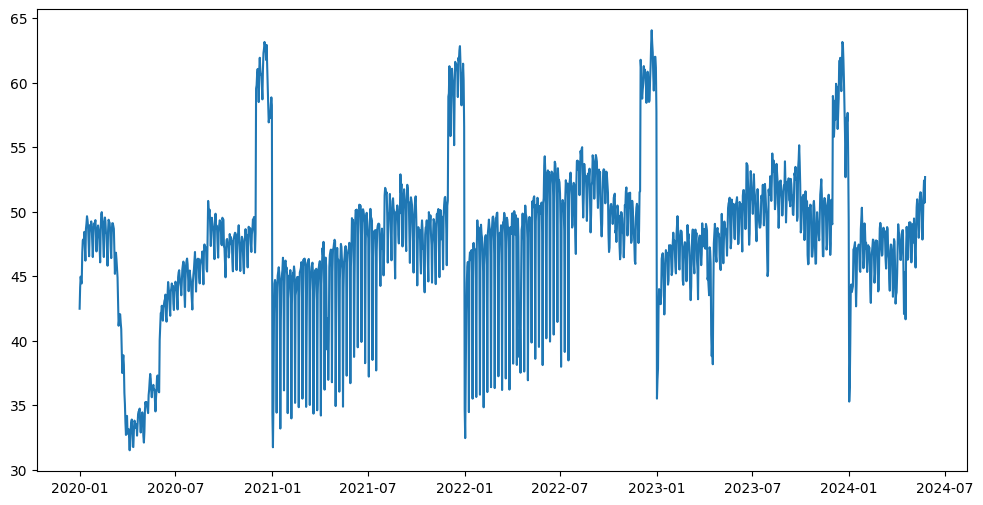

In [5]:
# Plot
train['date'] = pd.to_datetime(train['date'])
tes['date'] = pd.to_datetime(tes['date'])
plt.figure(figsize=(12,6))
plt.plot(train['date'], train['daily_ktCO2'])

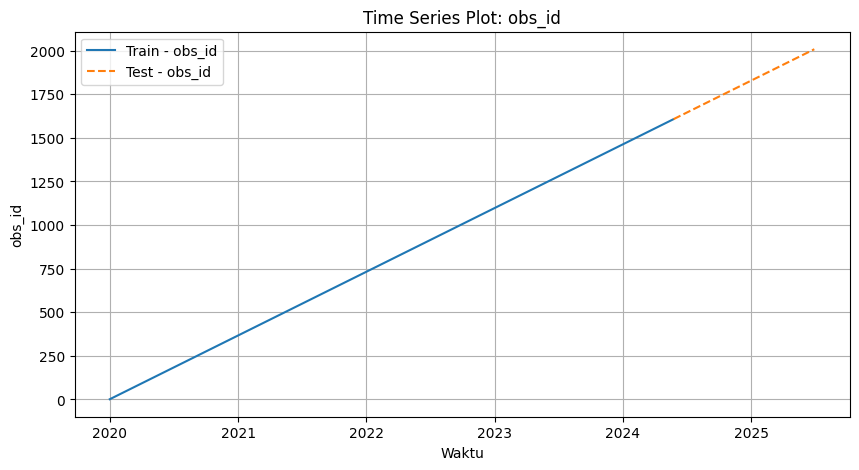

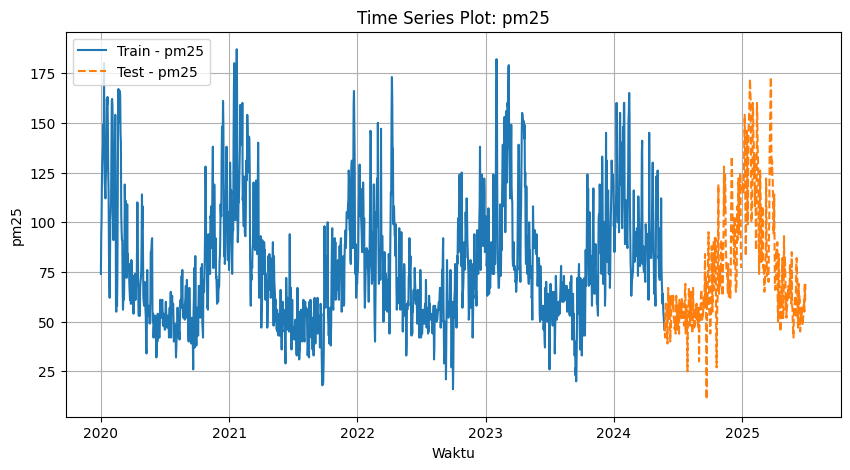

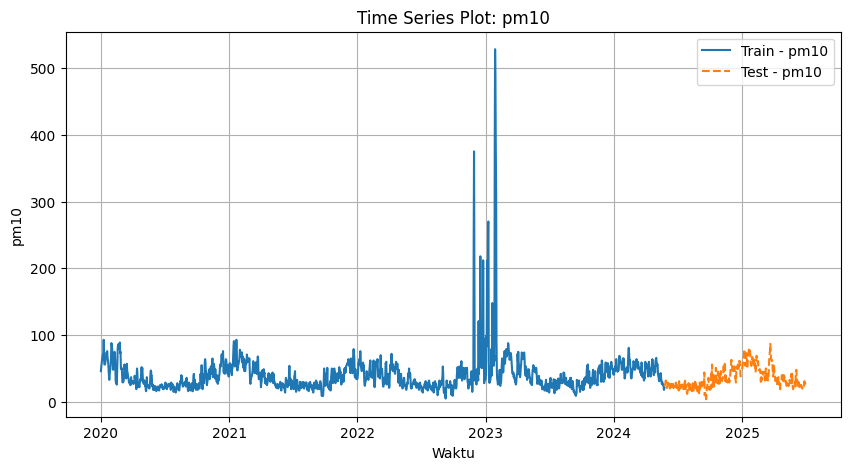

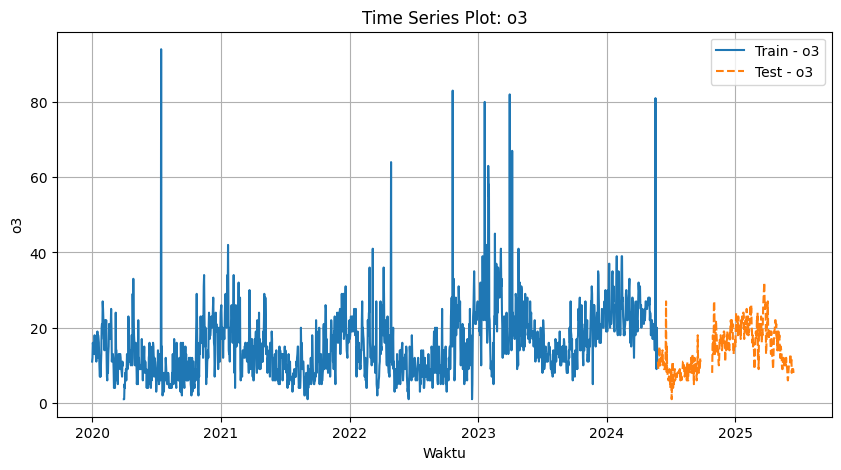

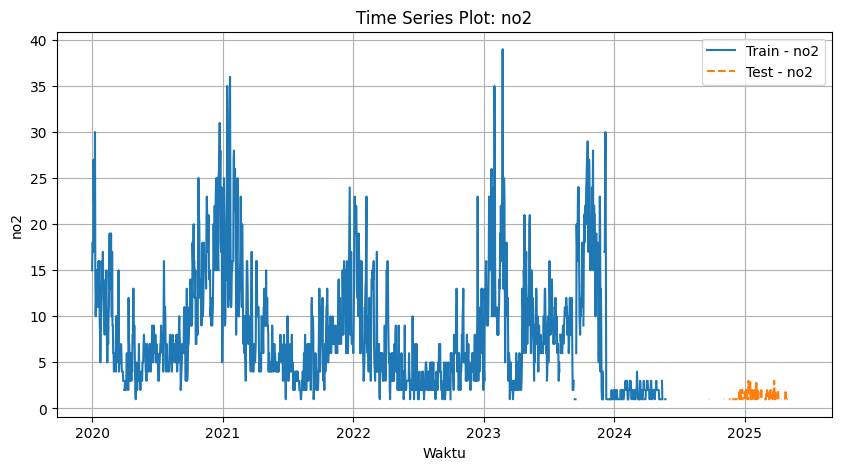

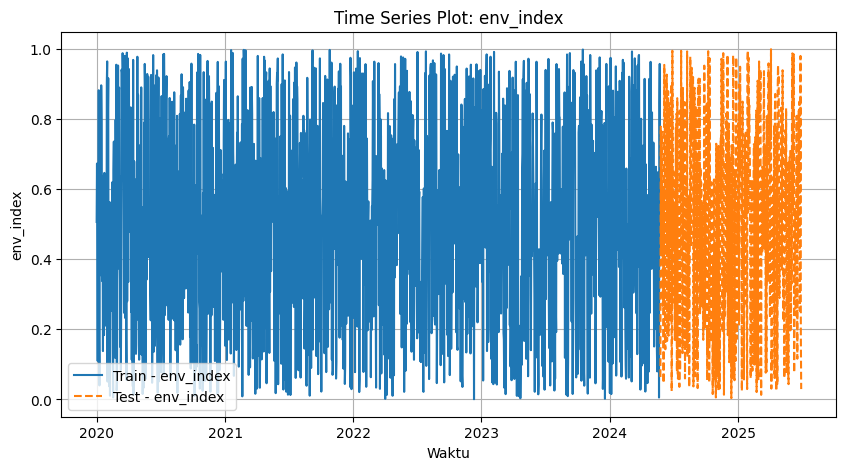

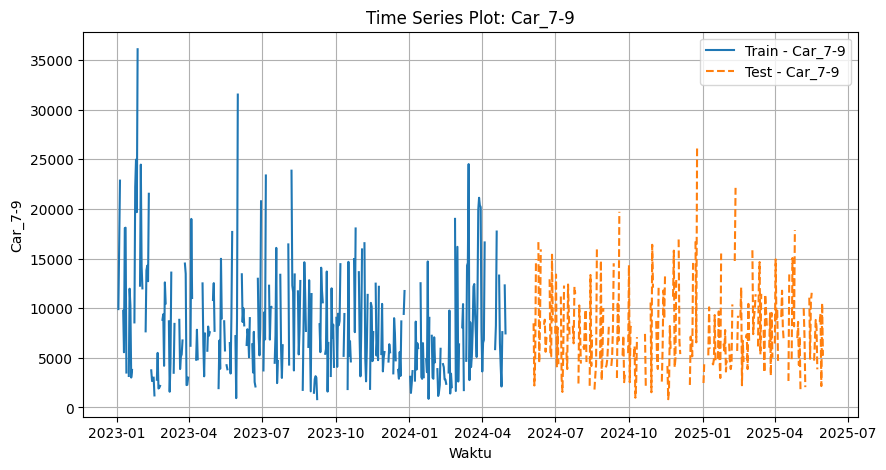

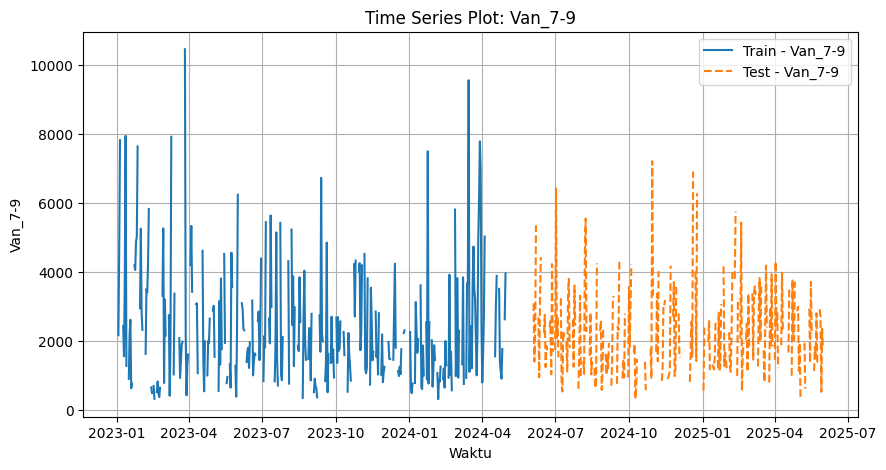

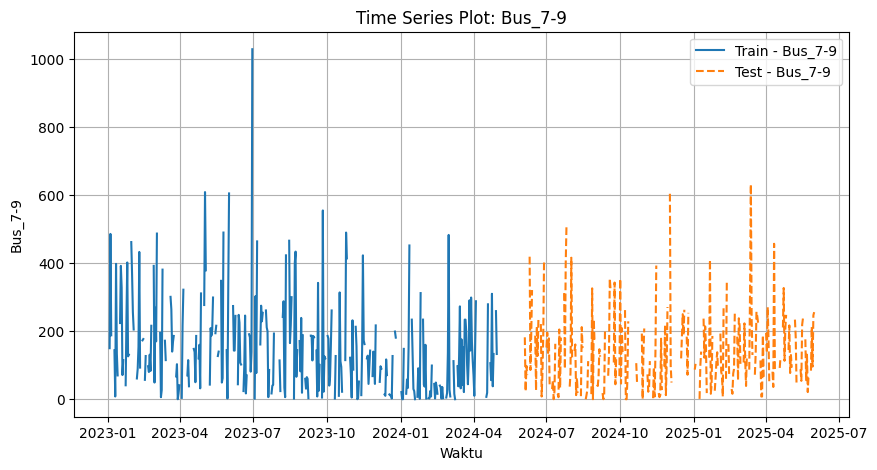

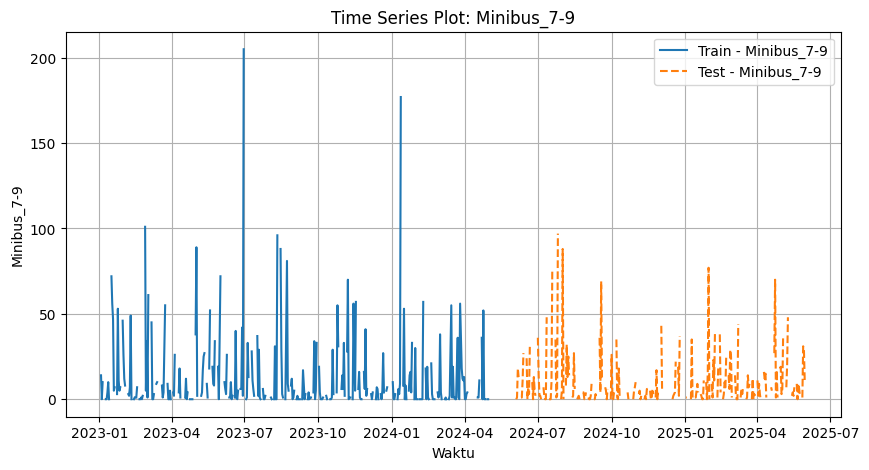

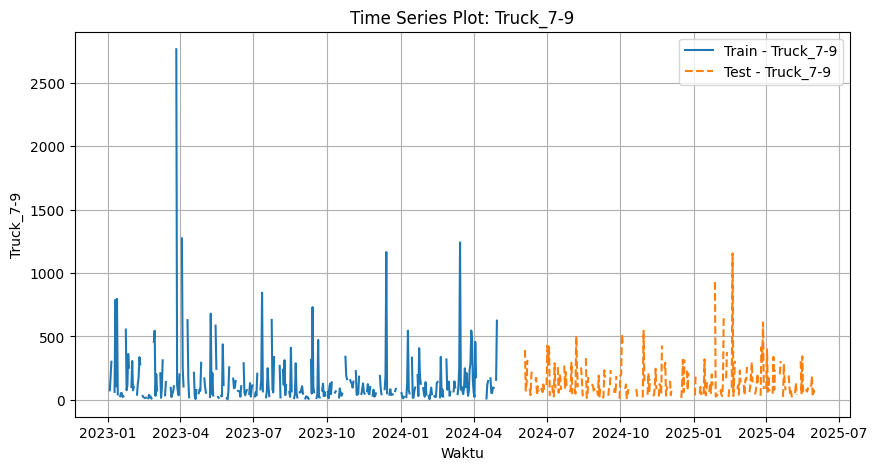

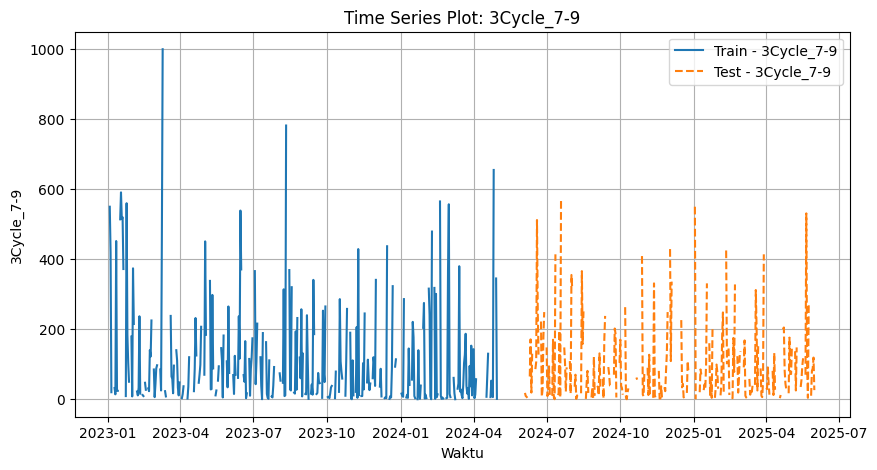

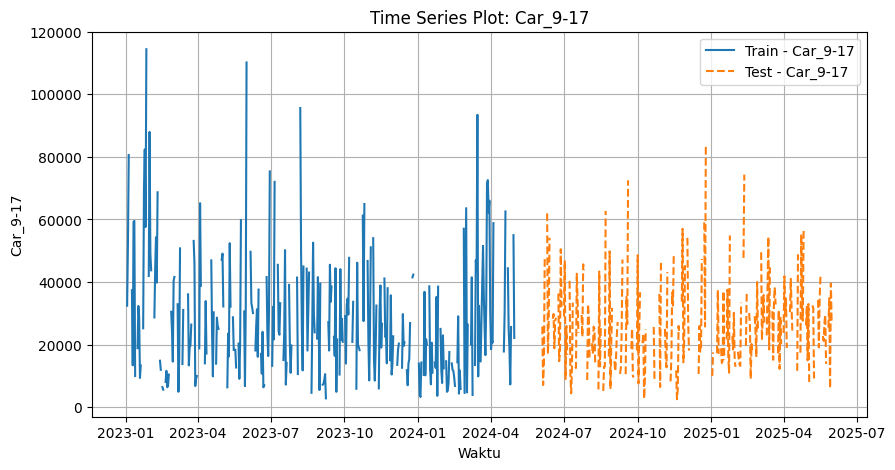

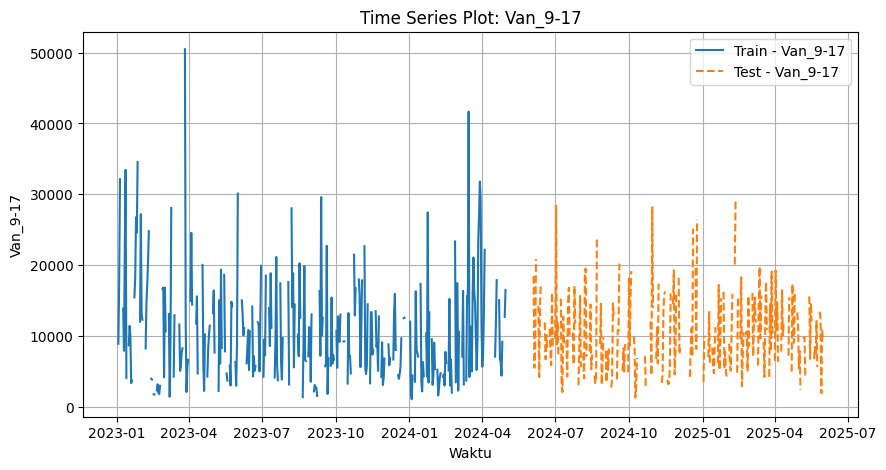

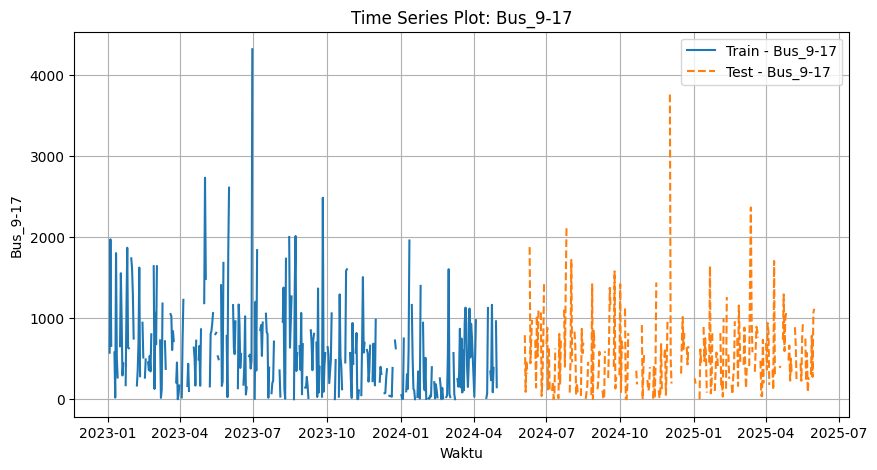

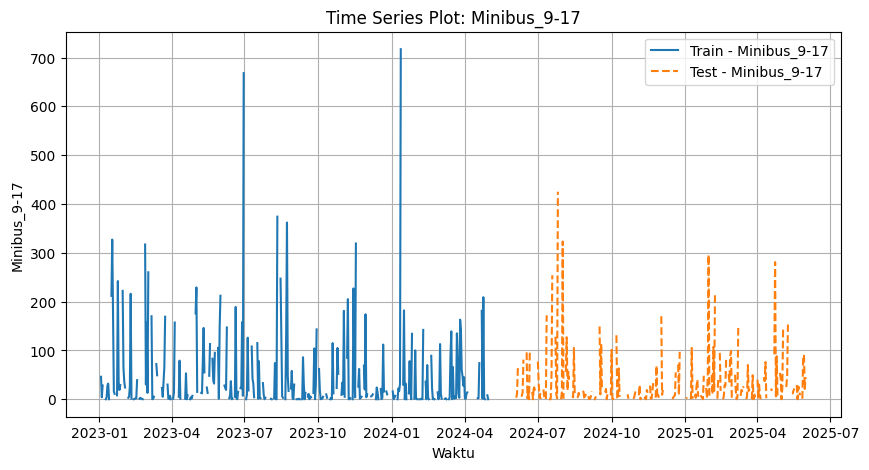

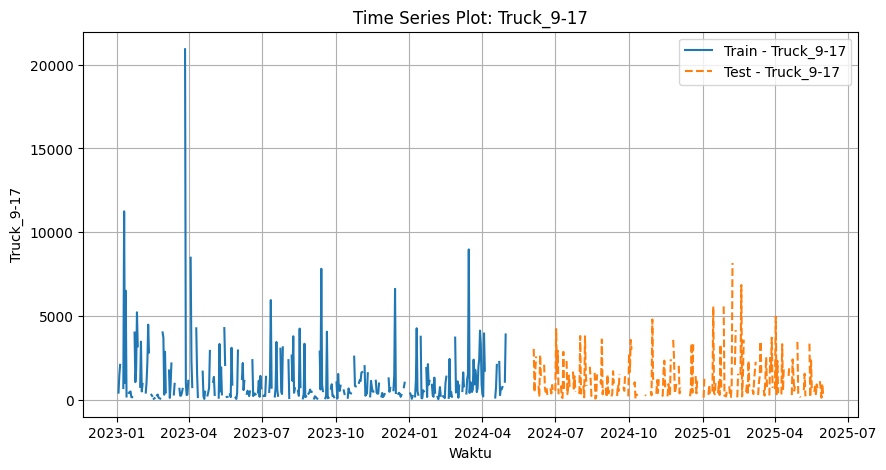

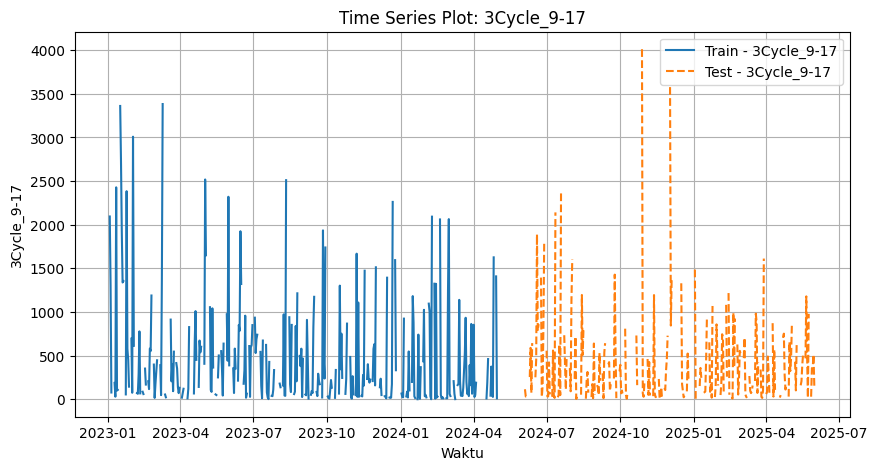

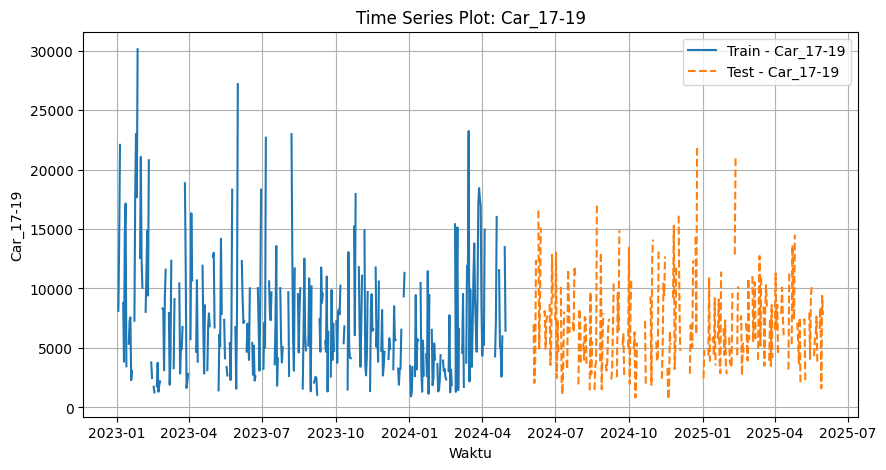

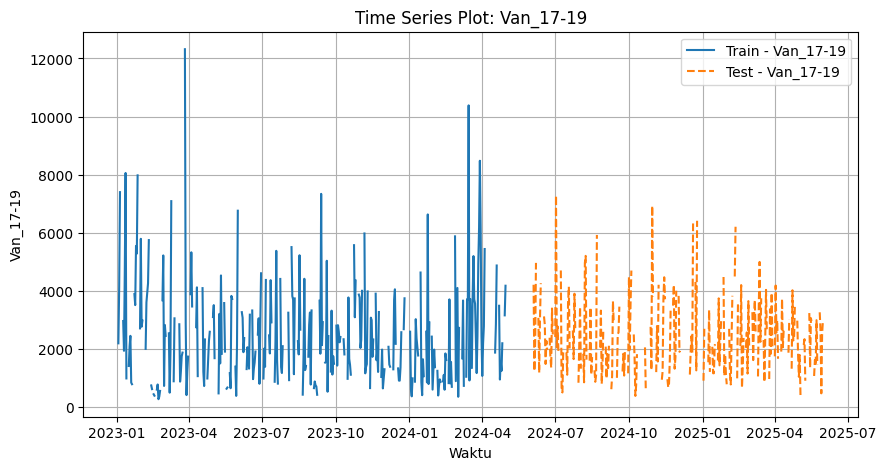

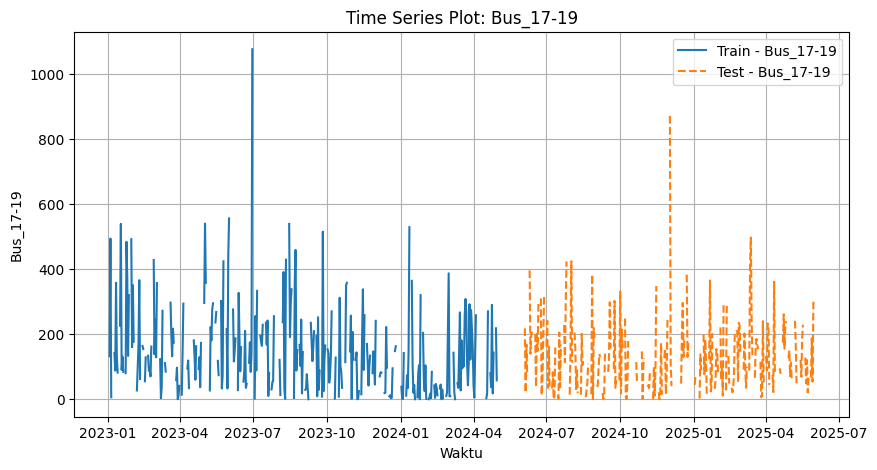

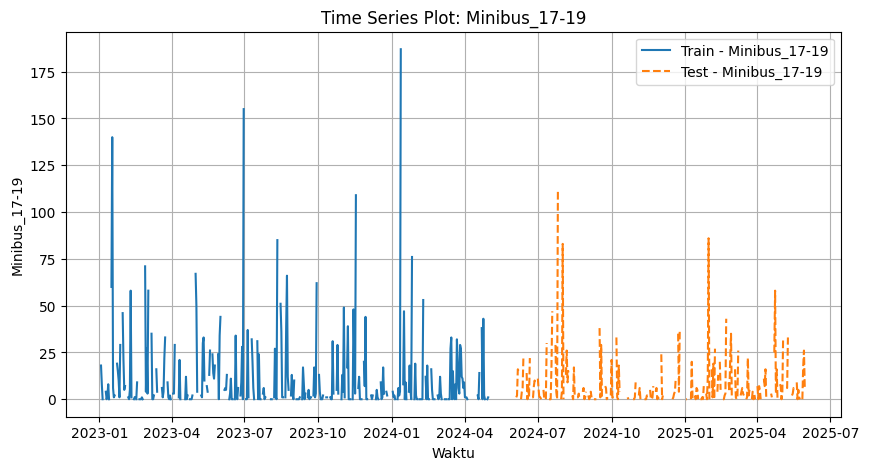

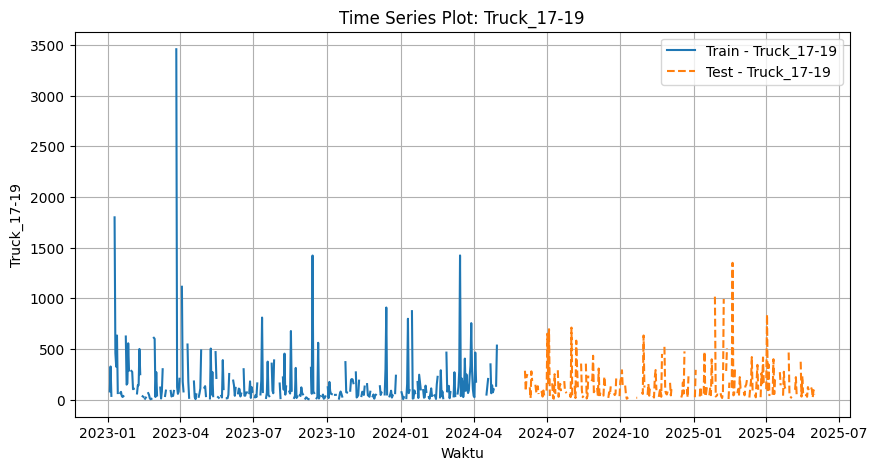

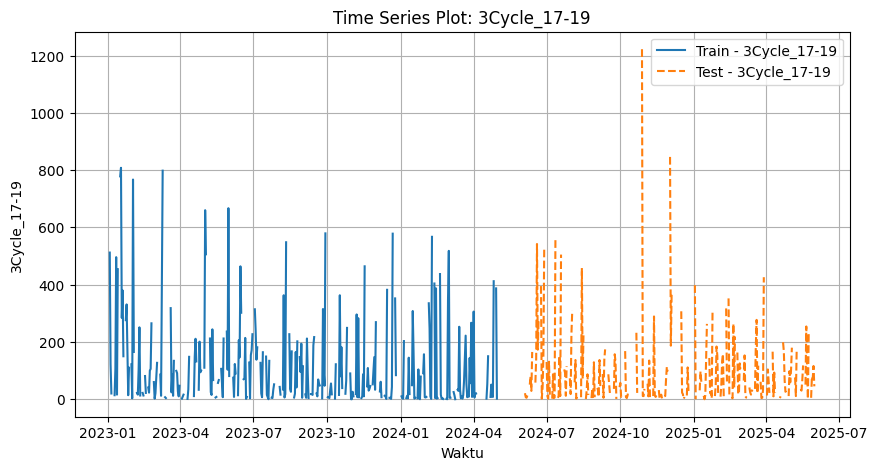

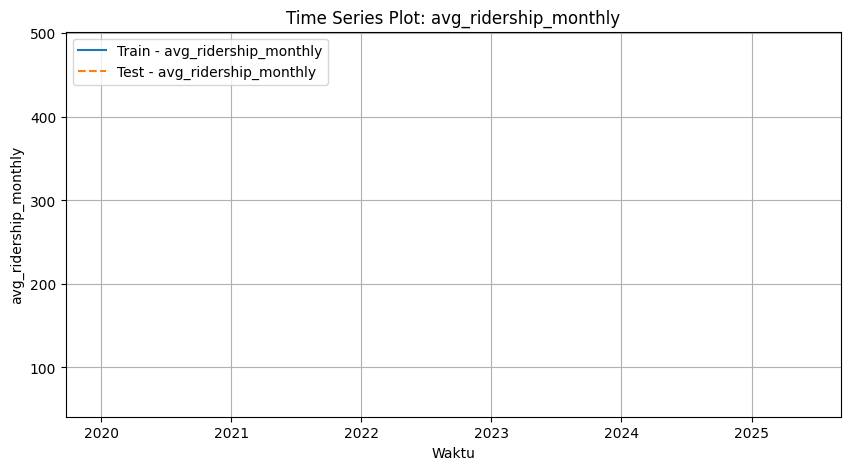

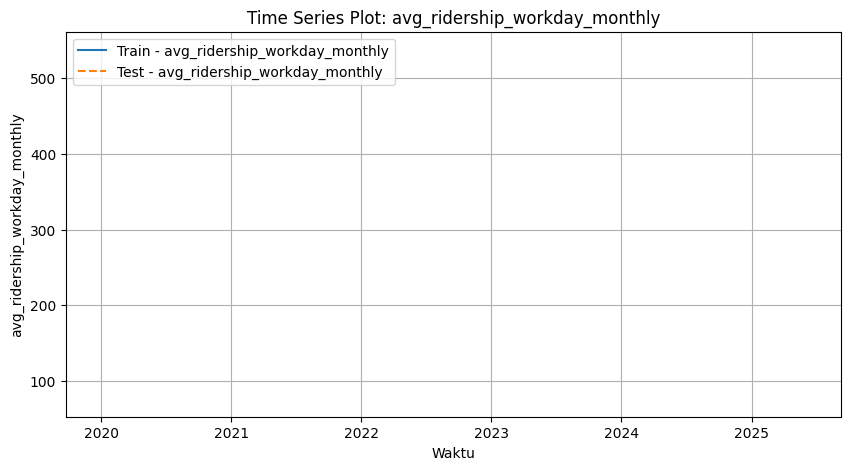

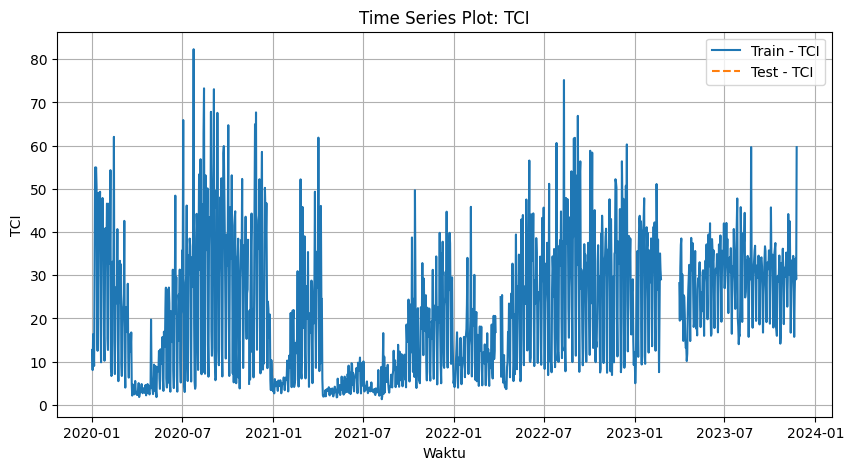

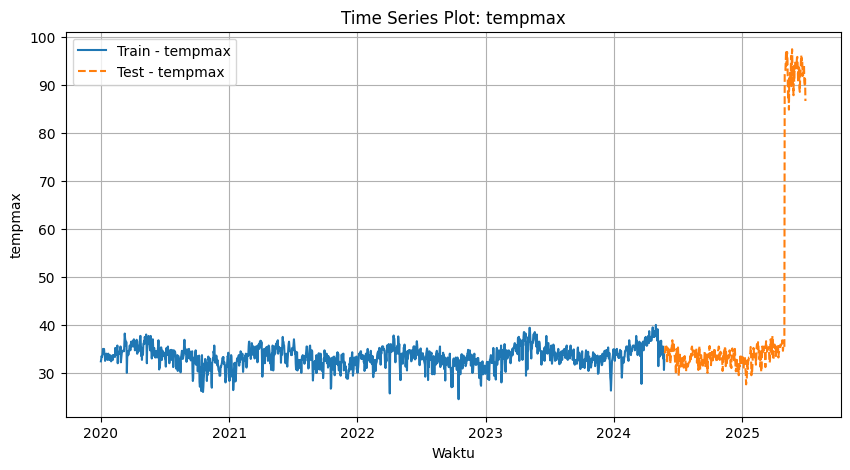

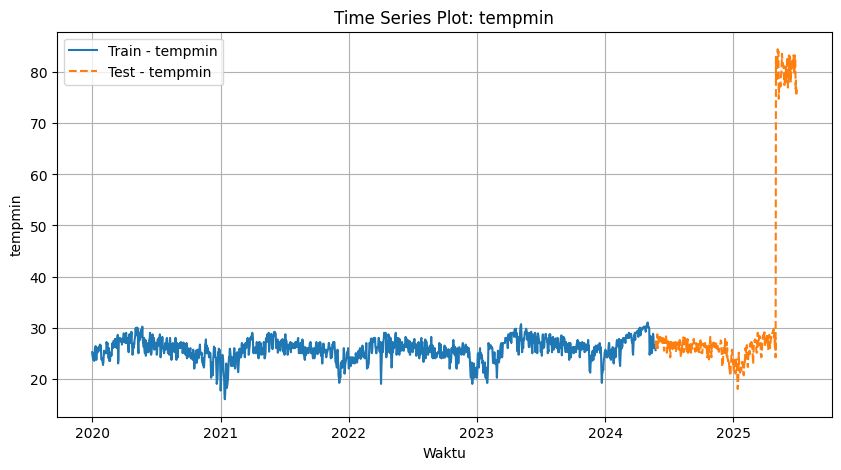

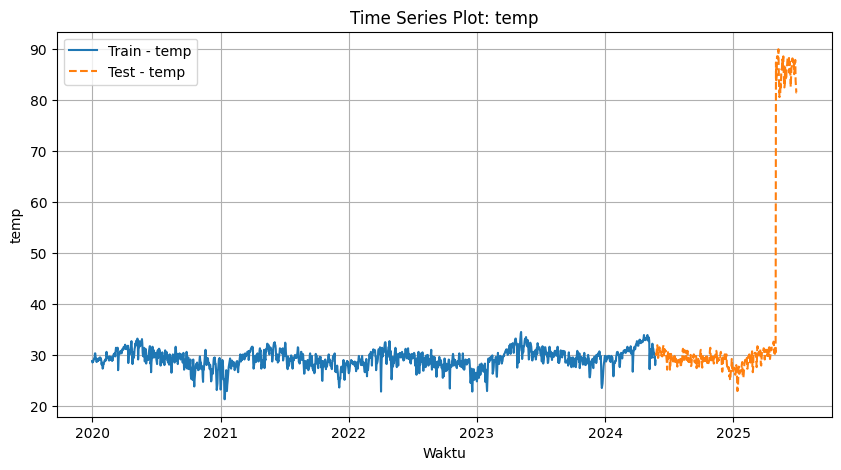

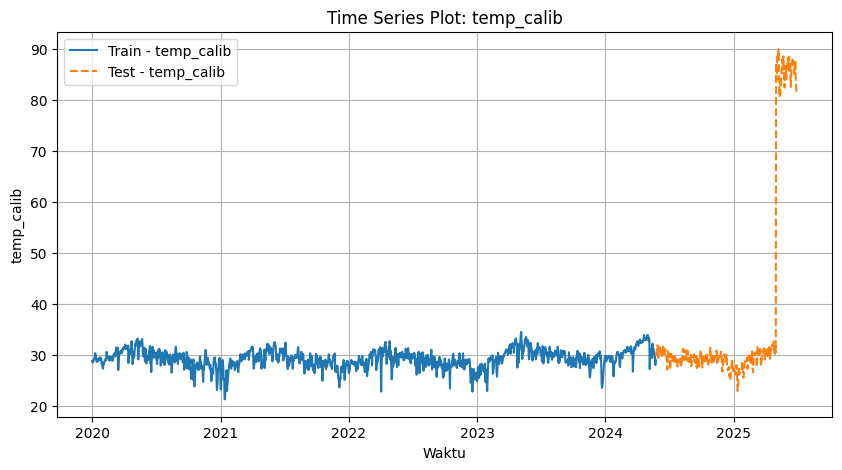

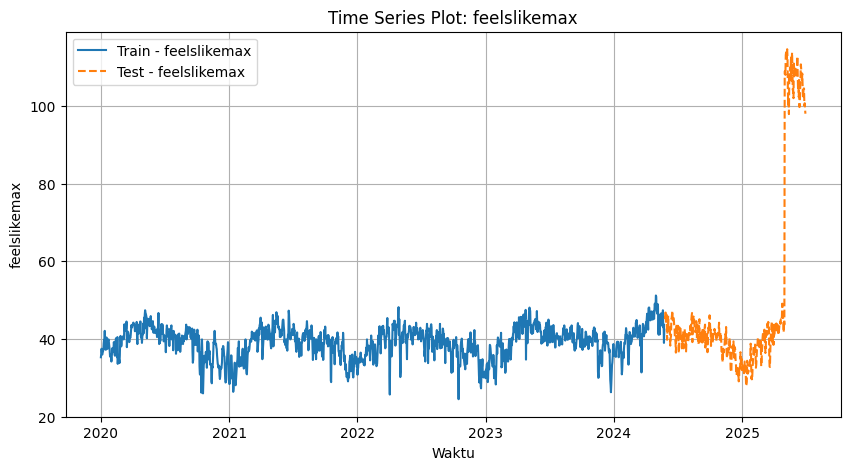

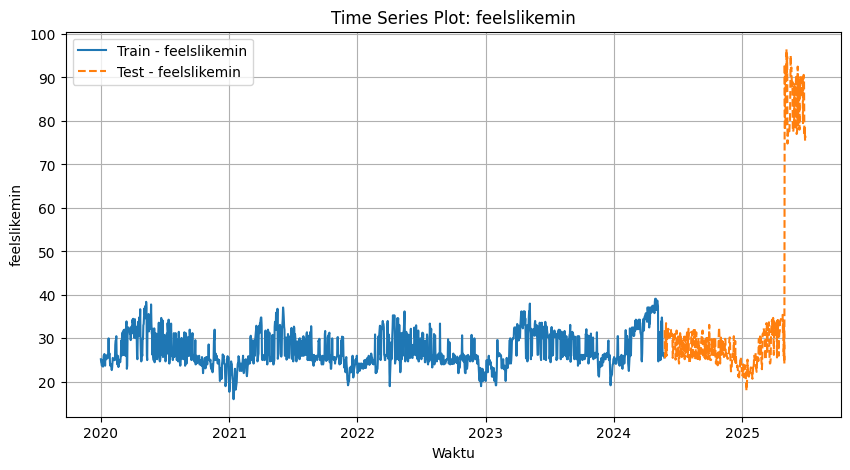

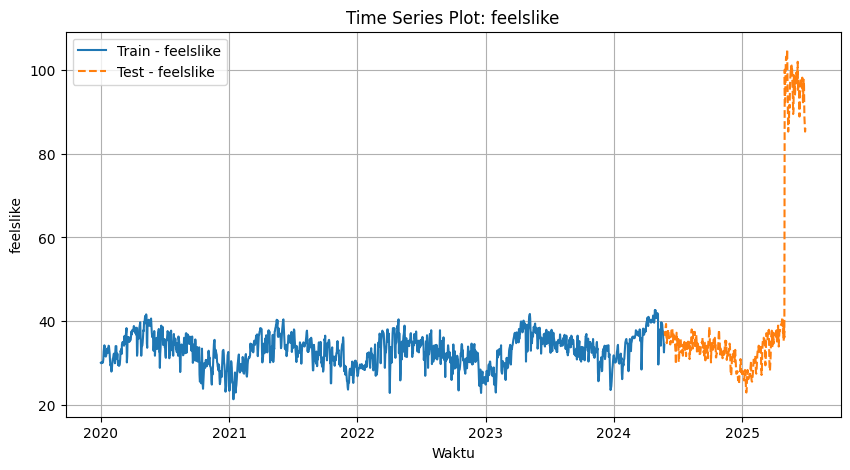

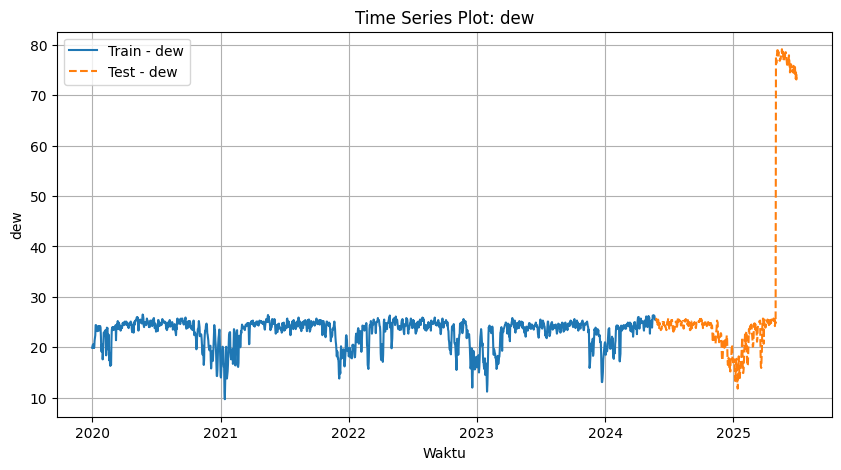

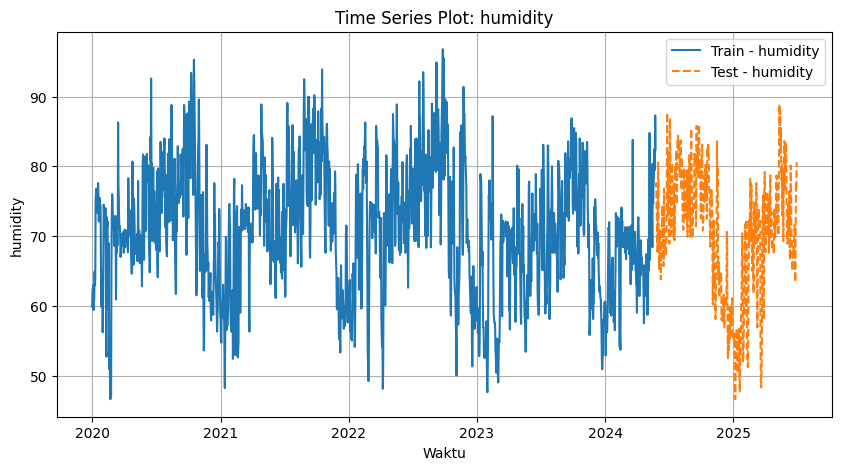

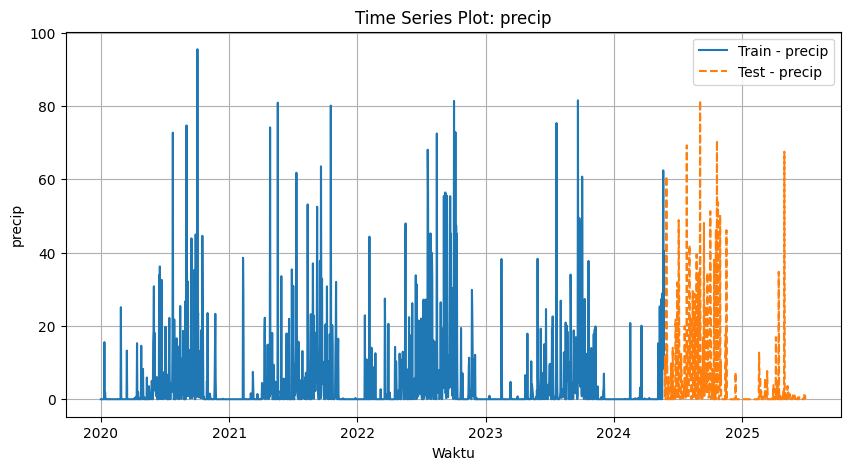

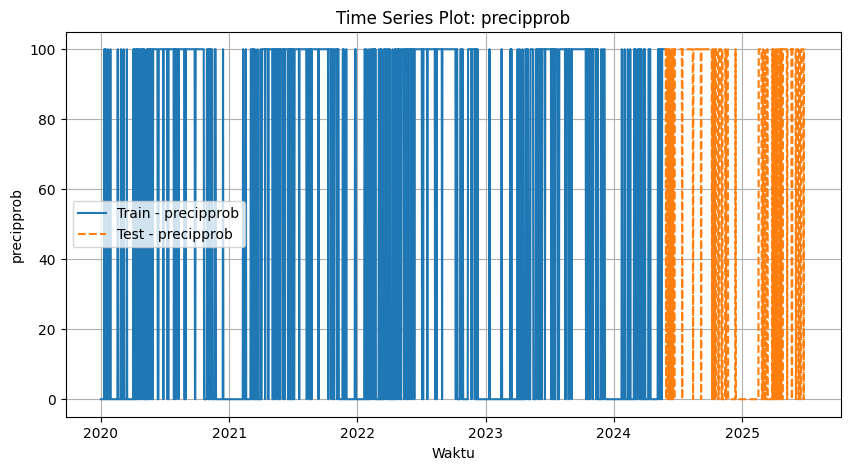

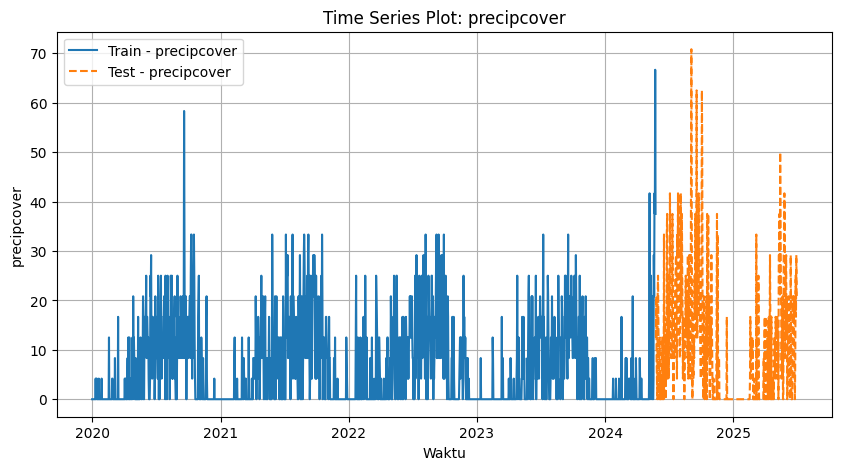

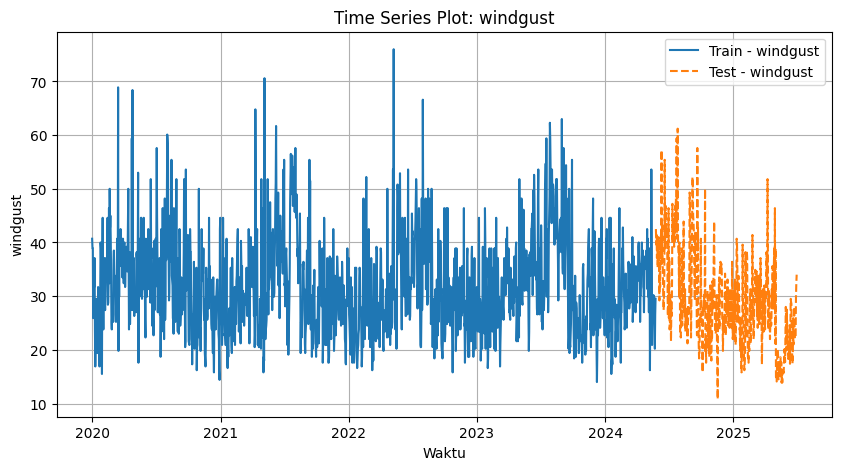

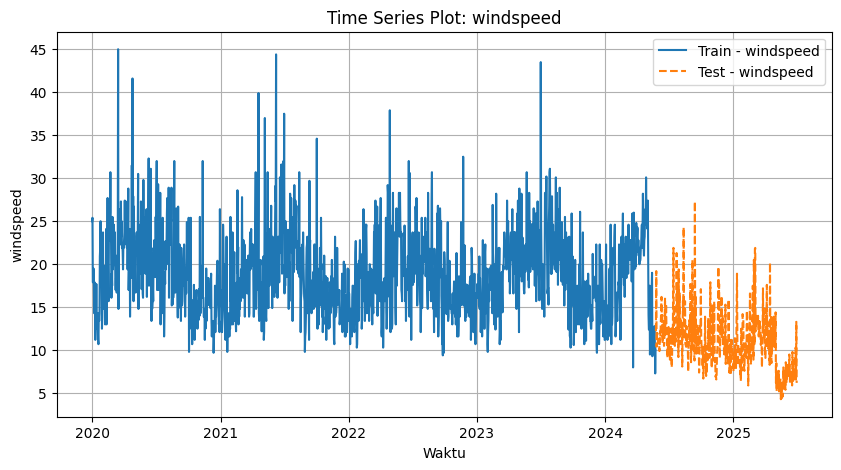

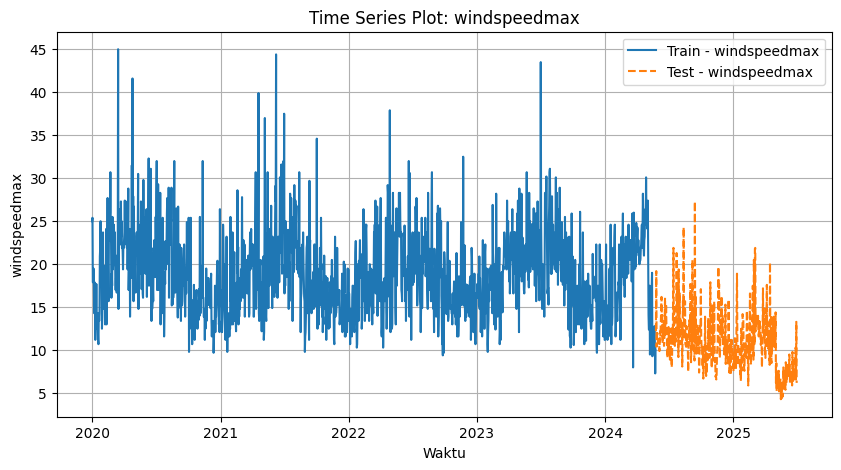

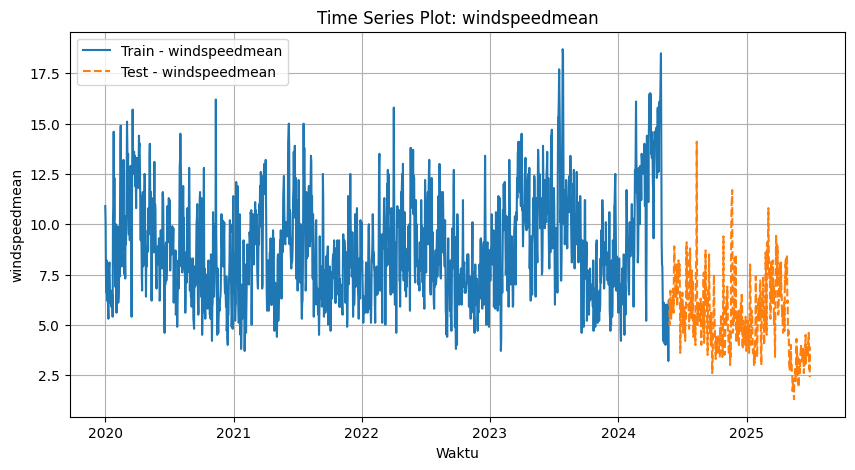

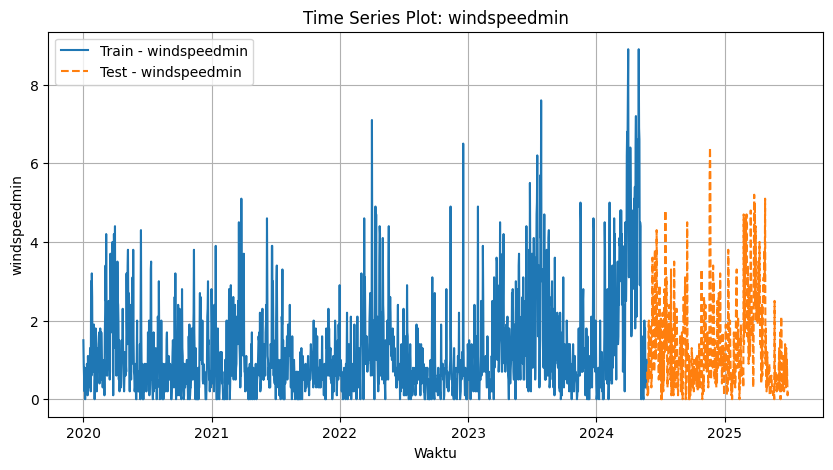

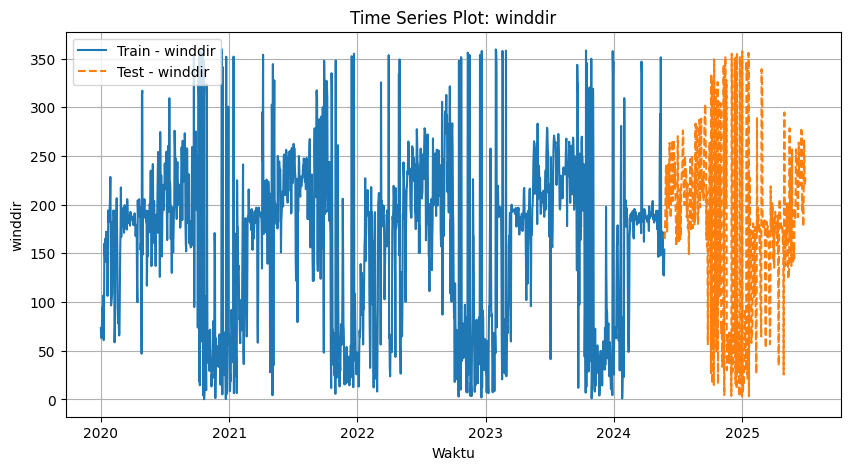

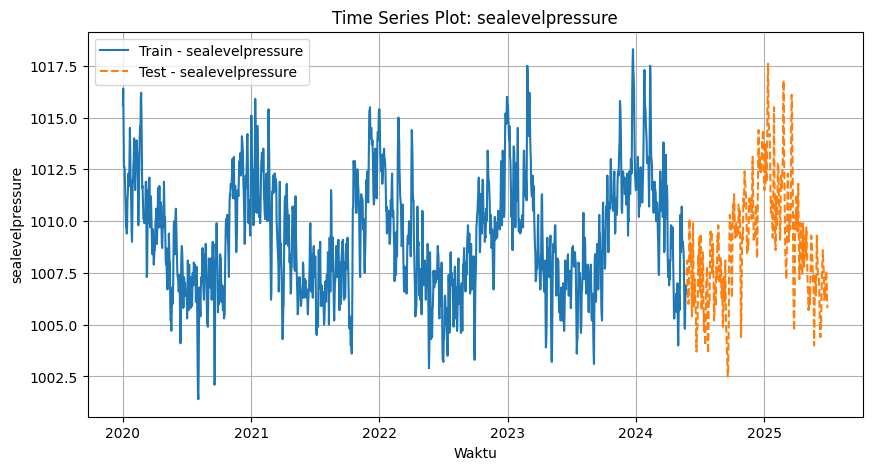

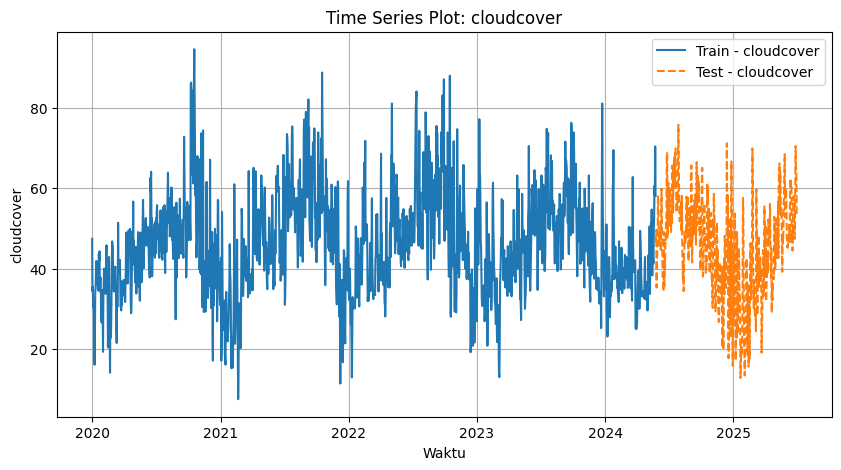

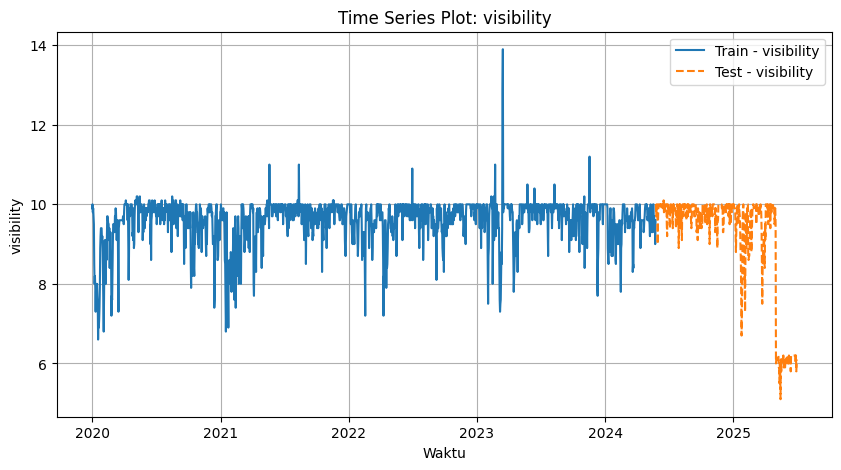

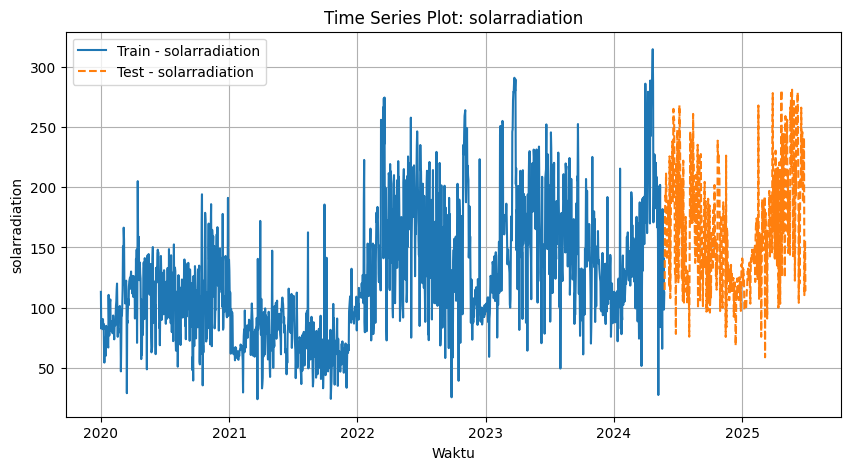

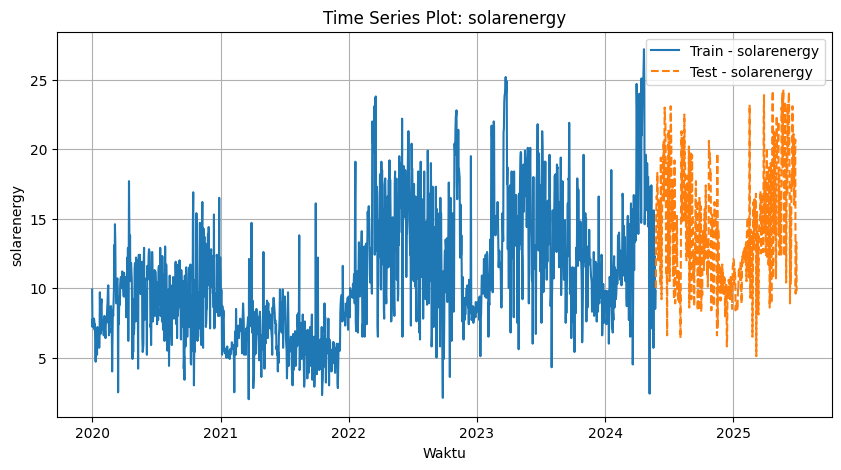

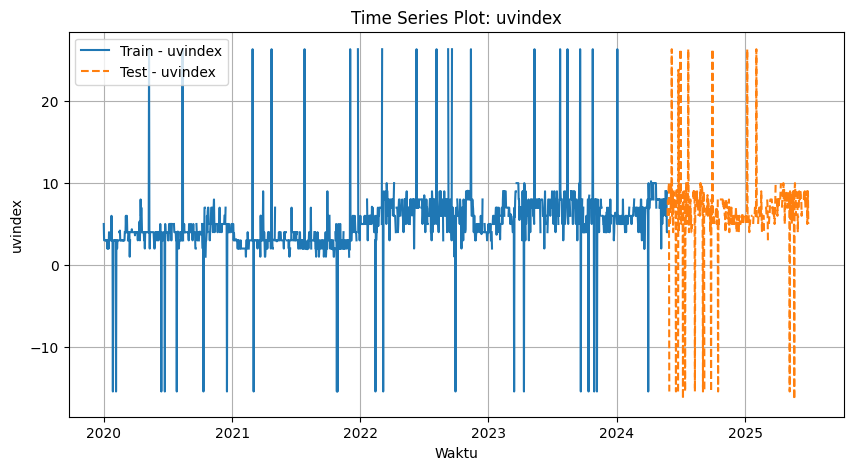

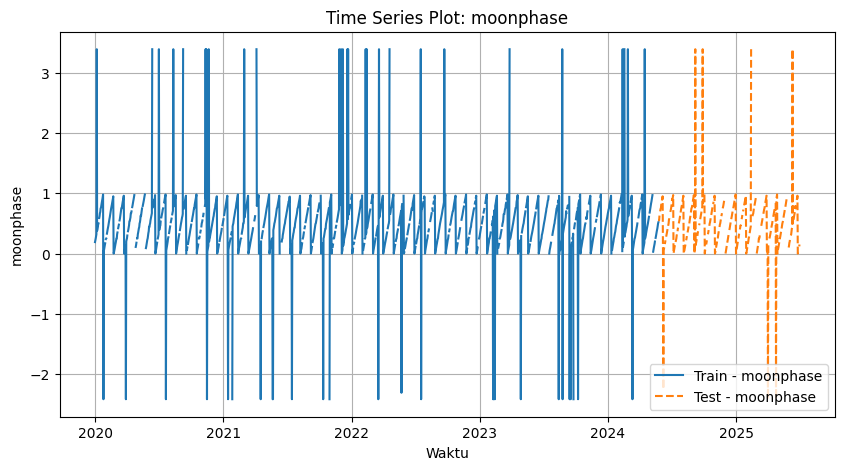

In [6]:
import matplotlib.pyplot as plt

# Ambil hanya kolom numerik (int dan float) kecuali 'daily_ktCO2'
num_cols = [col for col in train.select_dtypes(include=['int64', 'float64']).columns if col != 'daily_ktCO2']

# Pastikan 'date' ada sebagai kolom
for col in num_cols:
    plt.figure(figsize=(10, 5))
    plt.plot(train["date"], train[col], label=f"Train - {col}")
    plt.plot(tes["date"], tes[col], label=f"Test - {col}", linestyle="--")
    plt.title(f"Time Series Plot: {col}")
    plt.xlabel("Waktu")
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.show()

# Missing Values Identification

In [7]:
train.isnull().sum()

obs_id                              0
date                                0
daily_ktCO2                         0
pm25                                2
pm10                                2
o3                                  2
no2                                26
so2                              1275
env_index                           0
Car_7-9                          1296
Van_7-9                          1296
Bus_7-9                          1296
Minibus_7-9                      1296
Truck_7-9                        1296
3Cycle_7-9                       1296
Car_9-17                         1296
Van_9-17                         1296
Bus_9-17                         1296
Minibus_9-17                     1296
Truck_9-17                       1296
3Cycle_9-17                      1296
Car_17-19                        1296
Van_17-19                        1296
Bus_17-19                        1296
Minibus_17-19                    1296
Truck_17-19                      1296
3Cycle_17-19

In [8]:
tes.isnull().sum()

obs_id                             0
date                               0
pm25                               2
pm10                               2
o3                                49
no2                              249
so2                               85
env_index                          0
Car_7-9                          175
Van_7-9                          175
Bus_7-9                          175
Minibus_7-9                      175
Truck_7-9                        175
3Cycle_7-9                       175
Car_9-17                         175
Van_9-17                         175
Bus_9-17                         175
Minibus_9-17                     175
Truck_9-17                       175
3Cycle_9-17                      175
Car_17-19                        175
Van_17-19                        175
Bus_17-19                        175
Minibus_17-19                    175
Truck_17-19                      175
3Cycle_17-19                     175
avg_ridership_monthly            389
a

In [9]:
missing_train = (train.isnull().sum() / len(train)) * 100
missing_train = missing_train[missing_train > 0].sort_values(ascending=False)

print(missing_train)

missing_test = (tes.isnull().sum() / len(tes)) * 100
missing_test = missing_test[missing_test > 0].sort_values(ascending=False)

print(missing_test)

avg_ridership_workday_monthly    96.699875
avg_ridership_monthly            96.699875
3Cycle_9-17                      80.697385
Van_9-17                         80.697385
3Cycle_17-19                     80.697385
Truck_17-19                      80.697385
Minibus_17-19                    80.697385
Bus_17-19                        80.697385
Van_17-19                        80.697385
Car_17-19                        80.697385
Truck_9-17                       80.697385
Minibus_9-17                     80.697385
Bus_9-17                         80.697385
Car_9-17                         80.697385
3Cycle_7-9                       80.697385
Truck_7-9                        80.697385
Minibus_7-9                      80.697385
Bus_7-9                          80.697385
Van_7-9                          80.697385
Car_7-9                          80.697385
so2                              79.389788
TCI                              14.259029
seasons                          10.149440
conditions 

# Drop columns with a high proportion of missing values

In [10]:
train = train.drop(columns = ['so2','Car_7-9','Van_7-9','Bus_7-9','Minibus_7-9','Truck_7-9','3Cycle_7-9','Car_9-17','Van_9-17','Bus_9-17',
                              'Minibus_9-17','Truck_9-17','3Cycle_9-17','Car_17-19','Van_17-19','Bus_17-19','Minibus_17-19','Truck_17-19',
                              '3Cycle_17-19','avg_ridership_monthly','avg_ridership_workday_monthly','no2','TCI','obs_id','weekend'])

tes = tes.drop(columns = ['so2','Car_7-9','Van_7-9','Bus_7-9','Minibus_7-9','Truck_7-9','3Cycle_7-9','Car_9-17','Van_9-17','Bus_9-17',
                              'Minibus_9-17','Truck_9-17','3Cycle_9-17','Car_17-19','Van_17-19','Bus_17-19','Minibus_17-19','Truck_17-19',
                              '3Cycle_17-19','avg_ridership_monthly','avg_ridership_workday_monthly','no2','TCI','obs_id','weekend'])

In [11]:
train

date  daily_ktCO2   pm25  pm10    o3  env_index  tempmax  tempmin  \
0    2020-01-01    42.471115   74.0  46.0  11.0   0.506768     32.4     25.2   
1    2020-01-02    44.128139   93.0  52.0  12.0   0.673507     32.8     24.5   
2    2020-01-03    44.960525  102.0  56.0  16.0   0.440693     33.5     24.2   
3    2020-01-04    44.524260  121.0  61.0  15.0   0.109702     33.3     23.7   
4    2020-01-05    44.428186  130.0  66.0  14.0   0.643137     33.6     25.0   
...         ...          ...    ...   ...   ...        ...      ...      ...   
1601 2024-05-20    49.143115   64.0  26.0  23.0   0.620641     35.5     26.2   
1602 2024-05-21    51.349693   56.0  26.0  11.0   0.005331     33.0     26.4   
1603 2024-05-22    52.405751   53.0  23.0   9.0   0.847391     34.0     26.6   
1604 2024-05-23    50.681848   50.0  18.0  20.0   0.958030     30.6     26.2   
1605 2024-05-24    52.676925   46.0  21.0  11.0   0.580304     32.7     25.6   

      temp  temp_calib  ...  sealevelpressure  cloudcover  visibility  \
0     28.8   28.799336  ...            1015.6        47.4         9.9   
1     28.5   28.484089  ...            1016.4        34.4        10.0   
2     28.7   28.733255  ...            1014.6        35.5         9.8   
3     28.7   28.703517  ...            1012.6        30.4         9.9   
4     28.9   28.892651  ...            1012.6        31.6         9.7   
...    ...         ...  ...               ...         ...         ...   
1601  30.4   30.389803  ...            1004.8        53.0         9.7   
1602  29.4   29.394650  ...            1006.0        60.6         9.3   
1603  29.6   29.610489  ...            1006.9        58.3         9.5   
1604  28.0   27.995174  ...            1006.5        70.4         9.0   
1605  28.9   28.916607  ...            1006.7        58.1         9.6   

      solarradiation  solarenergy  uvindex  moonphase              conditions  \
0              113.1          9.9      5.0       0.19        Partially cloudy   
1               82.6          7.2      3.0       0.22        Partially cloudy   
2               88.8          7.8      3.0       0.25        Partially cloudy   
3               85.3          7.3      3.0       0.29                     NaN   
4               88.7          7.5      3.0       0.32        Partially cloudy   
...              ...          ...      ...        ...                     ...   
1601           107.1          9.4      6.0       0.39  Rain, Partially cloudy   
1602           128.8         11.0      8.0       0.42  Rain, Partially cloudy   
1603           141.3         12.3      9.0       0.46  Rain, Partially cloudy   
1604            98.4          8.5      4.0       0.50  Rain, Partially cloudy   
1605           112.6          9.8      4.0       0.52  Rain, Partially cloudy   

     seasons  holiday  
0        NaN      Yes  
1       Cool       No  
2       Cool       No  
3       Cool      Yes  
4       Cool      Yes  
...      ...      ...  
1601     HoT       No  
1602     Hot       No  
1603     Hot      NaN  
1604     Hot      NaN  
1605     Hot       No  

[1606 rows x 35 columns]

In [12]:
tes

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

date  pm25  pm10    o3  env_index  tempmax  tempmin  temp  \
0   2024-05-25  50.0  24.0  11.0   0.064032     34.4     27.5  30.3   
1   2024-05-26  42.0  26.0  11.0   0.778897     34.2     25.6  30.0   
2   2024-05-27  52.0  27.0   9.0   0.579115     35.5     25.9  30.7   
3   2024-05-28  59.0  32.0   9.0   0.410545     35.6     27.3  31.6   
4   2024-05-29  59.0  30.0  10.0   0.764583     34.9     28.7  31.9   
..         ...   ...   ...   ...        ...      ...      ...   ...   
397 2025-06-26  61.0  24.0   NaN   0.252989     94.0     82.9  87.9   
398 2025-06-27  55.0  31.0   NaN   0.518942     90.5     76.7  83.8   
399 2025-06-28  69.0  26.0   NaN   0.980781     90.1     78.4  82.5   
400 2025-06-29  61.0  29.0   NaN   0.187222     91.3     75.4  81.5   
401 2025-06-30  69.0  26.0   NaN   0.029546     86.7     76.6  81.5   

     temp_calib  feelslikemax  ...  sealevelpressure  cloudcover  visibility  \
0     30.315333          45.1  ...            1007.4        46.4        10.0   
1     29.985446          45.4  ...            1008.1        49.6         9.7   
2     30.693848          46.8  ...            1006.9        35.3        10.0   
3     31.607221          46.8  ...            1006.7        42.4        10.0   
4     31.905226          44.4  ...            1006.2        43.9        10.0   
..          ...           ...  ...               ...         ...         ...   
397   87.886324         104.5  ...            1007.6        62.3         6.2   
398   83.803636         100.1  ...            1007.6        70.5         6.0   
399   82.506073         100.7  ...            1006.8        64.8         6.2   
400   81.499262          99.0  ...            1006.2        64.6         5.8   
401   81.505025          98.0  ...            1005.8        53.0         6.1   

     solarradiation  solarenergy  uvindex  moonphase              conditions  \
0             114.7         10.0      6.0   0.560000  Rain, Partially cloudy   
1             177.8         15.4      8.0   0.550886  Rain, Partially cloudy   
2             193.0         16.6      NaN   0.630000  Rain, Partially cloudy   
3             190.8         16.5      9.0        NaN  Rain, Partially cloudy   
4             211.3         18.3     10.0   0.700000        Partially cloudy   
..              ...          ...      ...        ...                     ...   
397           241.0         20.7      9.0   0.020000  Rain, Partially cloudy   
398           110.4          9.6      5.0   0.060000  Rain, Partially cloudy   
399           140.9         12.2      7.0        NaN  Rain, Partially cloudy   
400           155.7         13.3      9.0   0.120000                     NaN   
401           113.7          9.8      5.0   0.150000  Rain, Partially cloudy   

     seasons  holiday  
0        Hot      Yes  
1        Hot      yes  
2        hot       No  
3        Hot       No  
4        Hot       No  
..       ...      ...  
397    Rainy       No  
398    Rainy       No  
399    Rainy      Yes  
400    Rainy      Yes  
401    Rainy       No  

[402 rows x 34 columns]

# Numerical Imputation

In [13]:
# --- Train ---
train['date'] = pd.to_datetime(train['date'])
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day

# --- Test ---
tes['date'] = pd.to_datetime(tes['date'])
tes['month'] = tes['date'].dt.month
tes['day'] = tes['date'].dt.day

num_cols_train = train.select_dtypes(include=['int64','float64']).columns
num_cols = [col for col in num_cols_train if col in tes.columns]

mean_lookup = train.groupby(['month','day'])[num_cols].mean()

# --- Imputation train ---
for col in num_cols:
    train[col] = train.groupby(['month','day'])[col].transform(lambda x: x.fillna(x.mean()))

# --- Imputation tes using lookup from train ---
for col in num_cols:
    tes[col] = tes.apply(
        lambda row: mean_lookup.loc[(row['month'], row['day']), col]
                    if pd.isna(row[col]) and (row['month'], row['day']) in mean_lookup.index
                    else row[col],
        axis=1
    )

# --- drop columns helper ---
train = train.drop(columns=['month','day'])
tes = tes.drop(columns=['month','day'])

In [14]:
train.isnull().sum()

date                  0
daily_ktCO2           0
pm25                  0
pm10                  0
o3                    0
env_index             0
tempmax               0
tempmin               0
temp                  0
temp_calib            0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
rain                159
windgust              0
windspeed             0
windspeedmax          0
windspeedmean         0
windspeedmin          0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
moonphase             0
conditions          161
seasons             163
holiday             155
dtype: int64

In [15]:
tes.isnull().sum()

date                 0
pm25                 0
pm10                 0
o3                   0
env_index            0
tempmax              0
tempmin              0
temp                 0
temp_calib           0
feelslikemax         0
feelslikemin         0
feelslike            0
dew                  0
humidity             0
precip               0
precipprob           0
precipcover          0
rain                41
windgust             0
windspeed            0
windspeedmax         0
windspeedmean        0
windspeedmin         0
winddir              0
sealevelpressure     0
cloudcover           0
visibility           0
solarradiation       0
solarenergy          0
uvindex              0
moonphase            0
conditions          39
seasons             37
holiday             45
dtype: int64

# Categorical Imputation

In [16]:
import pandas as pd
from scipy.stats import mode

train['date'] = pd.to_datetime(train['date'])
tes['date'] = pd.to_datetime(tes['date'])

# buat kolom month
train['month'] = train['date'].dt.month
tes['month'] = tes['date'].dt.month

# pilih kolom kategorik
cat_cols_train = train.select_dtypes(include=['object','category']).columns
cat_cols = [col for col in cat_cols_train if col in tes.columns]  # hanya yang ada di tes

# ---- Imputasi train ----
for col in cat_cols:
    train[col] = train.groupby('month')[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))

# ---- Imputasi tes pakai modus train per bulan ----
# buat lookup modus per bulan dari train
modus_lookup = train.groupby('month')[cat_cols].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

for col in cat_cols:
    tes[col] = tes.apply(
        lambda row: modus_lookup.loc[row['month'], col] 
                    if pd.isna(row[col]) and row['month'] in modus_lookup.index 
                    else row[col],
        axis=1
    )

# hapus kolom bantu
train = train.drop(columns=['month'])
tes = tes.drop(columns=['month'])

/tmp/ipykernel_36/4032853323.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[col] = train.groupby('month')[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))


In [17]:
train.isnull().sum()

date                0
daily_ktCO2         0
pm25                0
pm10                0
o3                  0
env_index           0
tempmax             0
tempmin             0
temp                0
temp_calib          0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
rain                0
windgust            0
windspeed           0
windspeedmax        0
windspeedmean       0
windspeedmin        0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
moonphase           0
conditions          0
seasons             0
holiday             0
dtype: int64

In [18]:
tes.isnull().sum()

date                0
pm25                0
pm10                0
o3                  0
env_index           0
tempmax             0
tempmin             0
temp                0
temp_calib          0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
rain                0
windgust            0
windspeed           0
windspeedmax        0
windspeedmean       0
windspeedmin        0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
moonphase           0
conditions          0
seasons             0
holiday             0
dtype: int64

# Data Cleaning and One-Hot Encoding for Categorical Variables

In [19]:
for df in [train, tes]:
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in cat_cols:
        df[col] = df[col].astype(str).str.lower()

In [20]:
import numpy as np

for df in [train, tes]:
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in cat_cols:
        # pastikan lowercase
        df[col] = df[col].apply(lambda x: str(x).lower() if pd.notnull(x) else x)
        # ubah string "nan" kembali ke np.nan
        df[col] = df[col].replace("nan", np.nan)

In [21]:
# Kolom yang akan di-OHE
categorical_cols = ['rain', 'conditions', 'seasons', 'holiday']

# One-Hot Encoding untuk train
train_ohe = pd.get_dummies(train, columns=categorical_cols, drop_first=False)

# One-Hot Encoding untuk test
tes_ohe = pd.get_dummies(tes, columns=categorical_cols, drop_first=False)

# Pastikan kolom train & test konsisten (kadang test tidak punya semua kategori)
tes_ohe = tes_ohe.reindex(columns=train_ohe.columns, fill_value=0)

# Time Series Plot of Daily CO₂ Emissions Post July 18, 2022

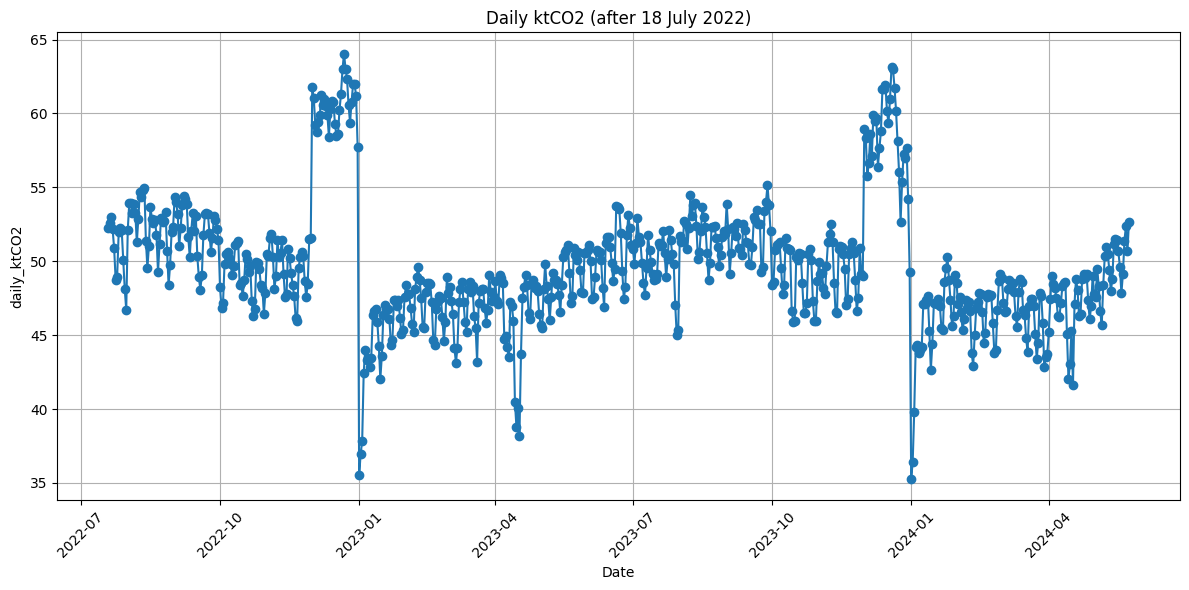

In [22]:
train_ohe['date'] = pd.to_datetime(train_ohe['date'])

start_date = '2022-07-18'

train_ohe = train_ohe[train_ohe['date'] > start_date]

# Plot time series
plt.figure(figsize=(12,6))
plt.plot(train_ohe['date'], train_ohe['daily_ktCO2'], marker='o')
plt.title('Daily ktCO2 (after 18 July 2022)')
plt.xlabel('Date')
plt.ylabel('daily_ktCO2')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
train_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 676 entries, 930 to 1605
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   date                               676 non-null    datetime64[ns]
 1   daily_ktCO2                        676 non-null    float64       
 2   pm25                               676 non-null    float64       
 3   pm10                               676 non-null    float64       
 4   o3                                 676 non-null    float64       
 5   env_index                          676 non-null    float64       
 6   tempmax                            676 non-null    float64       
 7   tempmin                            676 non-null    float64       
 8   temp                               676 non-null    float64       
 9   temp_calib                         676 non-null    float64       
 10  feelslikemax                       676 n

# Hybrid Time Series Forecasting Using Prophet and CatBoost

13:37:52 - cmdstanpy - INFO - Chain [1] start processing
13:37:52 - cmdstanpy - INFO - Chain [1] done processing


✅ RMSE Prophet baseline: 1.831
✅ RMSE Hybrid Prophet + CatBoost: 1.716


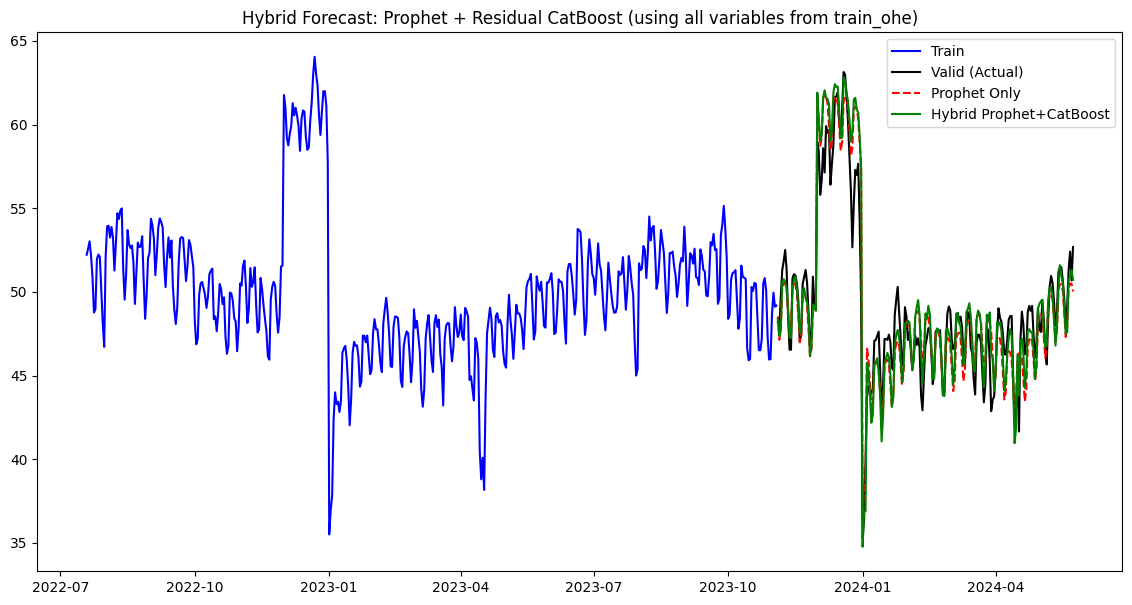

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

df_prophet = train_ohe[['date', 'daily_ktCO2']].copy()
df_prophet.rename(columns={'date': 'ds', 'daily_ktCO2': 'y'}, inplace=True)
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

exog = train_ohe.copy()
exog['ds'] = pd.to_datetime(exog['date'])
exog = exog.drop(columns=['date']) 

december_peak = pd.DataFrame({
    'holiday': 'december_peak',
    'ds': pd.date_range(df_prophet['ds'].min(), df_prophet['ds'].max(), freq='D')
})
december_peak = december_peak[december_peak['ds'].dt.month == 12]

january_drop = pd.DataFrame({
    'holiday': 'january_drop',
    'ds': pd.date_range(df_prophet['ds'].min(), df_prophet['ds'].max(), freq='D')
})
january_drop = january_drop[(january_drop['ds'].dt.month == 1) &
                            (january_drop['ds'].dt.day.isin([1,2,3]))]

holidays = pd.concat([december_peak, january_drop])

split_index = int(len(df_prophet) * 0.7)
train = df_prophet.iloc[:split_index].copy()
valid = df_prophet.iloc[split_index:].copy()

train_exog = exog.iloc[:split_index].drop(columns=['ds'])
valid_exog = exog.iloc[split_index:].drop(columns=['ds'])

prophet_model = Prophet(
    daily_seasonality=False,
    yearly_seasonality=True,
    weekly_seasonality=True,
    holidays=holidays
)
prophet_model.fit(train[['ds','y']])

# Forecast valid
valid_forecast = prophet_model.predict(valid[['ds']])
yhat_prophet = valid_forecast['yhat'].values

rmse_prophet = np.sqrt(mean_squared_error(valid['y'], yhat_prophet))
print(f"✅ RMSE Prophet baseline: {rmse_prophet:.3f}")


# Residual Prophet → CatBoost
train_forecast = prophet_model.predict(train[['ds']])
train['residual'] = train['y'] - train_forecast['yhat'].values

cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0,
    random_seed=42
)

cat_model.fit(train_exog, train['residual'])

resid_pred = cat_model.predict(valid_exog)

# Final forecast = Prophet + residual correction
yhat_hybrid = yhat_prophet + resid_pred

rmse_hybrid = np.sqrt(mean_squared_error(valid['y'], yhat_hybrid))
print(f"✅ RMSE Hybrid Prophet + CatBoost: {rmse_hybrid:.3f}")

plt.figure(figsize=(14,7))
plt.plot(train['ds'], train['y'], label="Train", color="blue")
plt.plot(valid['ds'], valid['y'], label="Valid (Actual)", color="black")
plt.plot(valid['ds'], yhat_prophet, label="Prophet Only", color="red", linestyle="--")
plt.plot(valid['ds'], yhat_hybrid, label="Hybrid Prophet+CatBoost", color="green")
plt.legend()
plt.title("Hybrid Forecast: Prophet + Residual CatBoost (using all variables from train_ohe)")
plt.show()

13:37:54 - cmdstanpy - INFO - Chain [1] start processing
13:37:55 - cmdstanpy - INFO - Chain [1] done processing


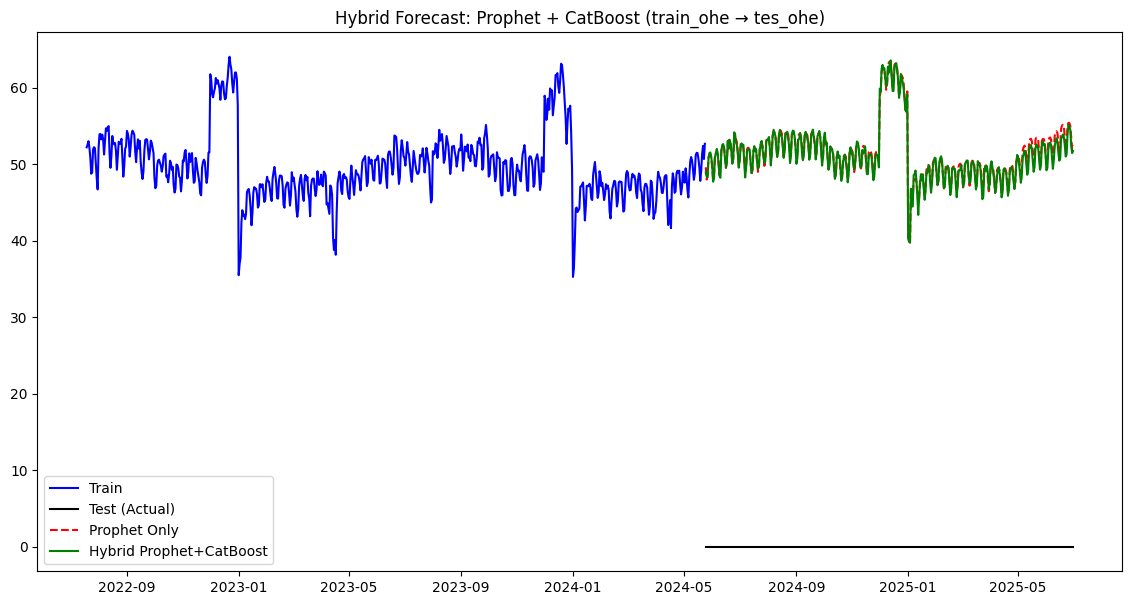

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

df_train = train_ohe.copy()
df_test = tes_ohe.copy()

df_train = df_train.rename(columns={'date':'ds','daily_ktCO2':'y'})
df_train['ds'] = pd.to_datetime(df_train['ds'])
df_test['ds'] = pd.to_datetime(df_test['date'])

X_train = df_train.drop(columns=['ds','y'])
X_test = df_test.drop(columns=['date','daily_ktCO2'], errors='ignore')  # test mungkin belum punya y

X_test = X_test[X_train.columns]  # urutkan sesuai train


# Holidays: Desember + Januari
december_peak = pd.DataFrame({
    'holiday': 'december_peak',
    'ds': pd.date_range(df_train['ds'].min(), df_test['ds'].max())
})
december_peak = december_peak[december_peak['ds'].dt.month == 12]

january_drop = pd.DataFrame({
    'holiday': 'january_drop',
    'ds': pd.date_range(df_train['ds'].min(), df_test['ds'].max())
})
january_drop = january_drop[
    (january_drop['ds'].dt.month == 1) & (january_drop['ds'].dt.day.isin([1,2,3]))
]

holidays = pd.concat([december_peak, january_drop])

prophet_model = Prophet(
    daily_seasonality=False,
    yearly_seasonality=True,
    weekly_seasonality=True,
    holidays=holidays
)
prophet_model.fit(df_train[['ds','y']])

train_forecast = prophet_model.predict(df_train[['ds']])
df_train['residual'] = df_train['y'] - train_forecast['yhat'].values

cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0,
    random_seed=123
)
cat_model.fit(X_train, df_train['residual'])

# Forecast test
future = df_test[['ds']].copy()
prophet_pred = prophet_model.predict(future)['yhat'].values

resid_pred_test = cat_model.predict(X_test)

# Hybrid forecast
hybrid_test = prophet_pred + resid_pred_test

plt.figure(figsize=(14,7))
plt.plot(df_train['ds'], df_train['y'], label='Train', color='blue')
if 'daily_ktCO2' in df_test.columns:
    plt.plot(df_test['ds'], df_test['daily_ktCO2'], label='Test (Actual)', color='black')
plt.plot(df_test['ds'], prophet_pred, label='Prophet Only', color='red', linestyle='--')
plt.plot(df_test['ds'], hybrid_test, label='Hybrid Prophet+CatBoost', color='green')
plt.legend()
plt.title("Hybrid Forecast: Prophet + CatBoost (train_ohe → tes_ohe)")
plt.show()

# 

# Feature Importance

13:37:57 - cmdstanpy - INFO - Chain [1] start processing
13:37:57 - cmdstanpy - INFO - Chain [1] done processing


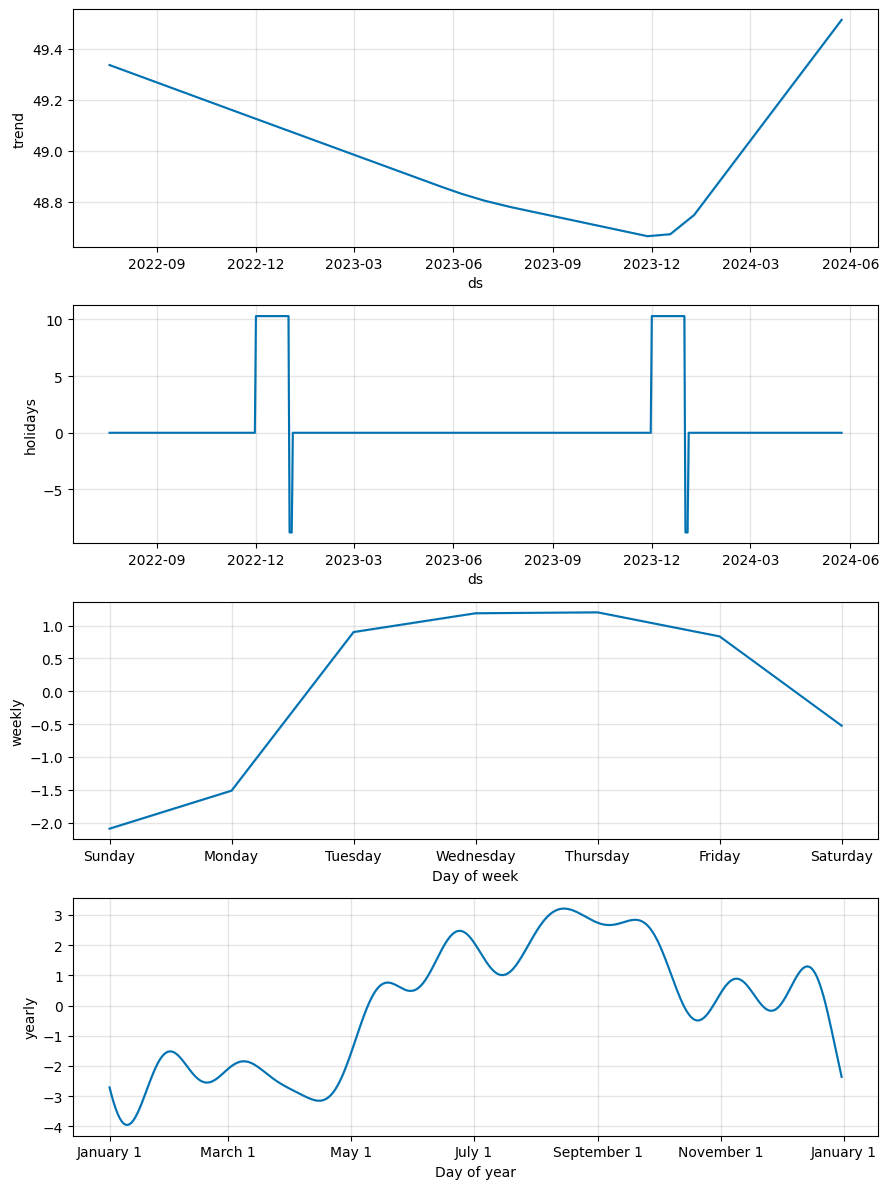

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

df_train = train_ohe.copy()
df_train = df_train.rename(columns={'date':'ds','daily_ktCO2':'y'})
df_train['ds'] = pd.to_datetime(df_train['ds'])

december_peak = pd.DataFrame({'holiday':'december_peak','ds': pd.date_range(df_train['ds'].min(), df_train['ds'].max())})
december_peak = december_peak[december_peak['ds'].dt.month==12]

january_drop = pd.DataFrame({'holiday':'january_drop','ds': pd.date_range(df_train['ds'].min(), df_train['ds'].max())})
january_drop = january_drop[(january_drop['ds'].dt.month==1) & (january_drop['ds'].dt.day.isin([1,2,3]))]

holidays = pd.concat([december_peak, january_drop])

prophet_model = Prophet(
    daily_seasonality=False,
    weekly_seasonality=True,
    yearly_seasonality=True,
    holidays=holidays
)

prophet_model.fit(df_train[['ds','y']])

train_forecast = prophet_model.predict(df_train[['ds']])

fig = prophet_model.plot_components(train_forecast)
plt.show()

       Feature  Importance
28   moonphase    8.169806
0         pm25    6.889407
1         pm10    6.209769
23  cloudcover    5.992976
2           o3    5.496870
16    windgust    5.072785
24  visibility    4.736550
21     winddir    4.548387
12    humidity    4.319360
3    env_index    4.070239


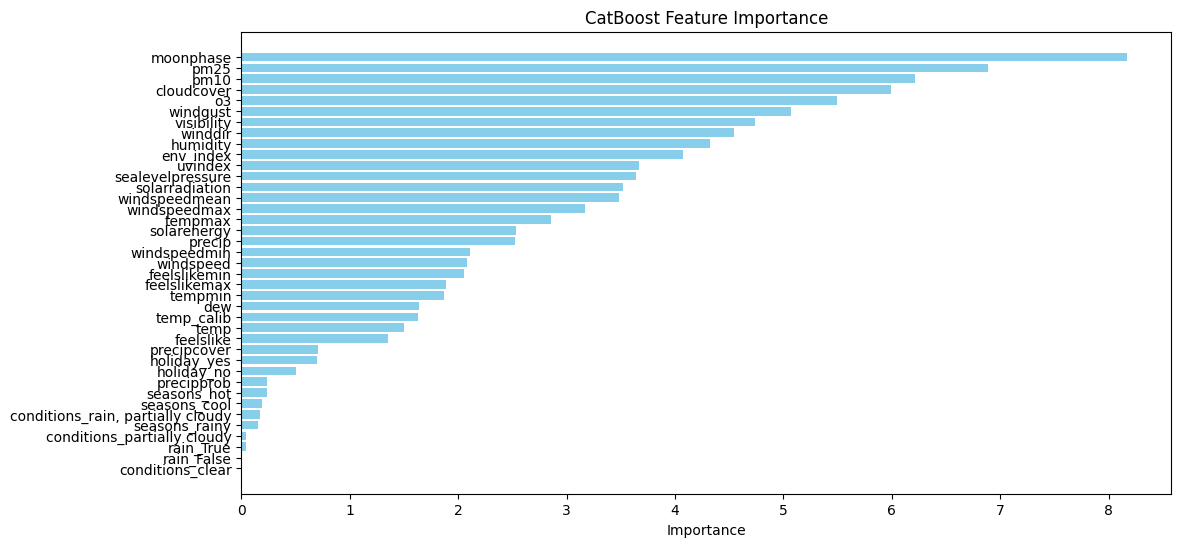

In [27]:
importances = cat_model.get_feature_importance()
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))

plt.figure(figsize=(12,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # agar fitur paling penting di atas
plt.xlabel("Importance")
plt.title("CatBoost Feature Importance")
plt.show()

# Make a Submission CSV

In [28]:
hybrid_forecast_df = df_test[['ds']].copy()
hybrid_forecast_df['yhat_hybrid'] = hybrid_test

print(hybrid_forecast_df.head())

          ds  yhat_hybrid
0 2024-05-25    48.915234
1 2024-05-26    48.362675
2 2024-05-27    48.298479
3 2024-05-28    50.816630
4 2024-05-29    51.472501


In [29]:
hybrid_forecast_df

ds  yhat_hybrid
0   2024-05-25    48.915234
1   2024-05-26    48.362675
2   2024-05-27    48.298479
3   2024-05-28    50.816630
4   2024-05-29    51.472501
..         ...          ...
397 2025-06-26    54.918404
398 2025-06-27    54.525767
399 2025-06-28    52.438887
400 2025-06-29    51.461994
401 2025-06-30    51.740576

[402 rows x 2 columns]

In [30]:
hybrid_forecast_df['ds']   = pd.to_datetime(hybrid_forecast_df['ds']).dt.strftime('%-m/%-d/%Y')

In [31]:
# Rename kolom
hybrid_forecast_df.rename(columns={
    'ds': 'date',
    'yhat_hybrid': 'daily_ktCO2'
}, inplace=True)

# Cek 5 baris pertama
print(hybrid_forecast_df.head())

        date  daily_ktCO2
0  5/25/2024    48.915234
1  5/26/2024    48.362675
2  5/27/2024    48.298479
3  5/28/2024    50.816630
4  5/29/2024    51.472501


In [32]:
hybrid_forecast_df.describe()

daily_ktCO2
count   402.000000
mean     51.240428
std       3.672788
min      39.763596
25%      49.212131
50%      50.840124
75%      52.596324
max      63.584157

In [33]:
hybrid_forecast_df.to_csv("/kaggle/working/submission.csv",index = False)